<a href="https://colab.research.google.com/github/bayuzen19/Business-Inteligence-Batch-3/blob/main/Day_16_Bank_Churn_Bayuzen_Ahmad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 2 - Customer Churn Modeling (100 poin)

Anda seorang konsultan data dari salah satu firma konsultan diminta oleh tim bisnis divisi Payment dari sebuah lembaga pinjaman online untuk memprediksi user mana yang tidak akan menggunakan platform mereka lagi untuk melakukan pembayaran online. Mereka sebelumnya pernah meminta konsultan lain untuk membuat modelnya namun konsultan tersebut tidak bisa menjawab mengapa customer diprediksi churn atau tidak berdasarkan model yang dibuat sehingga model tersebut tidak bisa dipakai karena tidak transparan dan tidak bisa memperoleh insight apapun dari model tersebut. <br>

Task <br>
Anda diberikan data dengan beberapa variabel yang diberikan sebagai berikut:
user_id: customer account number. <br>
attrition_flag: customer status (Existing and Attrited).<br>
customer_age: age of the customer.<br>
gender: gender of customer (M for male and F for female).<br>
dependent_count: number of dependents of customers.<br>
education_level: customer education level (Uneducated, High School, Graduate, College, Post-Graduate, Doctorate, and Unknown).<br>
marital_status: customer's marital status (Single, Married, Divorced, and Unknown).<br>
income_category: customer income interval category (Less than $40K, $40K-$60k, $60K-$80K, $80K-$120K, $120K +, and Unknown).<br>
card_category: type of card used (Blue, Silver, Gold, and Platinum).<br>
months_on_book: period of being a customer (in months).<br>
total_relationship_count: the number of products used by customers in the bank.<br>
months_inactive_12_mon: period of inactivity for the last 12 months.<br>
contacts_count_12_mon: the number of interactions between the bank and the customer in the last 12 months.<br>
credit_limit: credit card transaction nominal limit in one period.<br>
total_revolving_bal: total funds used in one period.<br>
avg_open_to_buy: the difference between the credit limit set for the cardholder's account and the current balance.<br>
total_amt_chng_q4_q1: increase in customer transaction nominal between quarter 4 and quarter 1.<br>
total_trans_amt: total nominal transaction in the last 12 months.<br>
total_trans_ct: the number of transactions in the last 12 months.<br>
total_ct_chng_q4_q1: the number of customer transactions increased between quarter 4 and quarter 1.<br>
avg_utilization_ratio: percentage of credit card usage.<br>

Beberapa yang harus anda lakukan:<br>
Analisa beberapa pertanyaan berikut berdasarkan data yang diberikan (20 poin):<br>
- Seperti apa distribusi usia para nasabah? Usia manakah yang cenderung memiliki kemungkinan churn terbesar?<br>
- Apakah terdapat korelasi antara tingkat pendidikan dan income category? <br>
- Bagaimana korelasi dari kedua prediktor tersebut terhadap churn?<br>
- Apakah terdapat perbedaan yang signifikan antara gender dengan kemungkinan nasabah untuk churn?<br>
- Apakah semakin lama customer menjadi nasabah maka semakin kecil kemungkinan nasabah tersebut untuk churn?<br>
- Apakah semakin sering customer berinteraksi dengan bank dalam 1 tahun terakhir mempengaruhi besar atau kecilnya kemungkinan nasabah untuk churn?<br>

Buatlah model prediksi dengan menggunakan model machine learning (bebas, tidak dibatasi) dan evaluasi seberapa baik model yang anda buat. Catatan: soal ini akan dinilai berdasarkan apakah mentee sudah menggunakan workflow dengan benar (30 poin)<br>

Anda ingin meyakinkan stakeholder anda bahwa model yang anda gunakan itu akan lebih baik dalam mengidentifikasi customer yang akan churn dibandingkan tanpa menggunakan model. Apa metrik yang dapat anda gunakan untuk membuktikan hal ini? Visualkan! (10 poin)<br>

(Open-Ended) Karena stakeholder anda membutuhkan knowledge dari model, analisislah model yang anda buat dengan menggunakan explanatory model analysis dan buatlah rekomendasi-rekomendasi berdasarkan hasil dari analisis tersebut (40 poin) <br>
Catatan: Gunakan hanya salah satu dari 3 metode ini tergantung jenis modelnya:
Jika model yang dipilih adalah model yang interpretable, gunakan teknik interpretasi sesuai dengan model yang dipilih
Jika model yang dipilih adalah model yang non-interpretable, gunakan metode model agnostics berikut:<br>
Permutation Feature Importance + Partial Dependence Plot
Shapley Additive Value Feature Importance + Shapley Dependence Plot
(40 poin)


In [1]:
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 34.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
#======Pandas Config========
import pandas as pd
pd.set_option("max_columns",None)

#=======Numpy=========
import numpy as np

#=======Visualization======
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette("bright")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#=======Preprocessing=======
# for Q-Q plots
import scipy.stats as stats
from feature_engine.outliers import Winsorizer
from scipy.stats import chi2_contingency

#=========Modeling ===========
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn import svm,tree
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc,roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split as tts
from sklearn import model_selection
#=====Warnings========
import warnings
warnings.filterwarnings("ignore")


#======Function========
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


def create_stacked_bar_percent(df,column_name):
        
    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['attrition_flag'],columns = df[column_name], normalize = 'columns')
    default_by_group = default_by_group[default_by_group.iloc[1].sort_values().index]
    
    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))
    
    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()
    
    list1_name = "Not Churn"
    list2_name = "Churn"
    title = f" %Churn by {column_name}"
    xlabel = column_name
    ylabel = "Number of Churn"
    
    fig, ax = plt.subplots(figsize=(8,8),dpi=100)
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold",fontsize=12)
    ax.set_xlabel(xlabel, fontweight = "bold",fontsize=12)
    ax.set_ylabel(ylabel, fontweight = "bold",fontsize=12)
    ax.legend(loc="upper right")
    
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=12)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="black", fontsize=12, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="black", fontsize=12, fontweight="bold")

    plt.show()

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

def missing_check(df):
  missing = df.isnull().sum()
  missing_per = round(missing/len(df),4)*100
  unique_val = df.nunique()
  type_data = df.dtypes
  df = pd.DataFrame({'Missing_values':missing,
                    'Percent of Missing (%)':missing_per,
                    'Numbers of Unique':unique_val,
                    'Data type':type_data})
  return df

# Load Dataset

In [3]:
df = pd.read_csv("https://bit.ly/adv_bi_bank_cust_churn")

# Data Inspection

In [4]:
#check 5 first row
df.head()

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
#check duplicate
df.duplicated(subset=['user_id']).sum()

0

there is no duplicate data

In [6]:
#check missing values,data type, dan numbers of unique value
missing_check(df)

,Missing_values,Percent of Missing (%),Numbers of Unique,Data type
user_id,0,0.0,10127,int64
attrition_flag,0,0.0,2,object
customer_age,0,0.0,45,int64
gender,0,0.0,2,object
dependent_count,0,0.0,6,int64
education_level,0,0.0,7,object
marital_status,0,0.0,4,object
income_category,0,0.0,6,object
card_category,0,0.0,4,object
months_on_book,0,0.0,44,int64


tidak terdapat data yang missing, selanjutnya akan dilakukan analisis

In [7]:
for x in df.columns:
  print(f"=========={x}===============")
  print(f"{df[x].unique()}")
  print()

==========user_id===============
[768805383 818770008 713982108 ... 716506083 717406983 714337233]

==========attrition_flag===============
['Existing Customer' 'Attrited Customer']

==========customer_age===============
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]

==========gender===============
['M' 'F']

==========dependent_count===============
[3 5 4 2 0 1]

==========education_level===============
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']

==========marital_status===============
['Married' 'Single' 'Unknown' 'Divorced']

==========income_category===============
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']

==========card_category===============
['Blue' 'Gold' 'Silver' 'Platinum']

==========months_on_book===============
[39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 

dari hasil investigasi nilai pada tiap kolom, terdapat hal aneh pada income dimana terdapat income yang tidak diketahui dan juga pada education level

# Eksplonatory Data Analysis

In [8]:
df = df.set_index('user_id')
df["attrition_flag"] = df["attrition_flag"].replace(['Existing Customer', 'Attrited Customer'],[0,1])
df["attrition_flag"].unique()

array([0, 1])

In [9]:
#spliiting data 80% training and 20% test
X = df.drop('attrition_flag',axis=1).copy()
y = df["attrition_flag"].copy()

X_train,X_test,y_train,y_test = tts(X,y,stratify=y,test_size=0.2,random_state=42)

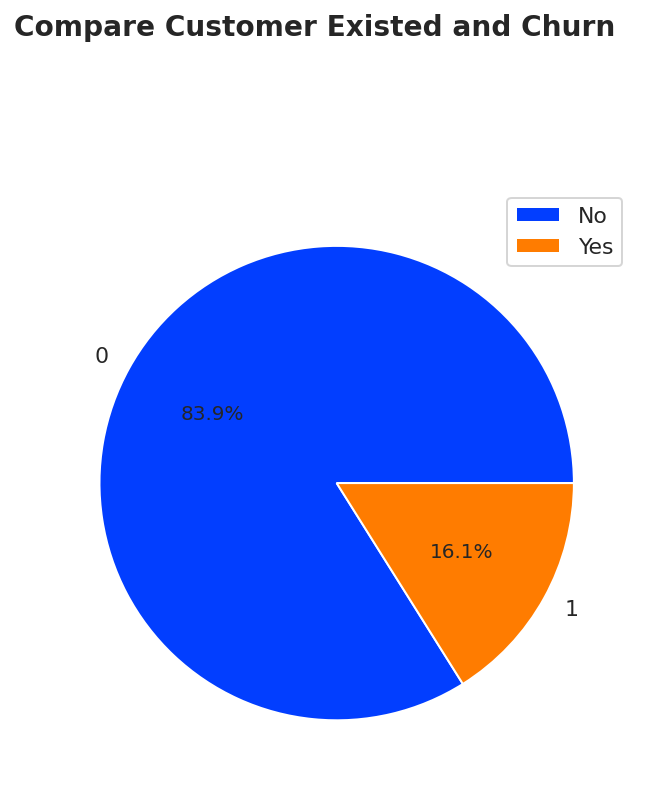

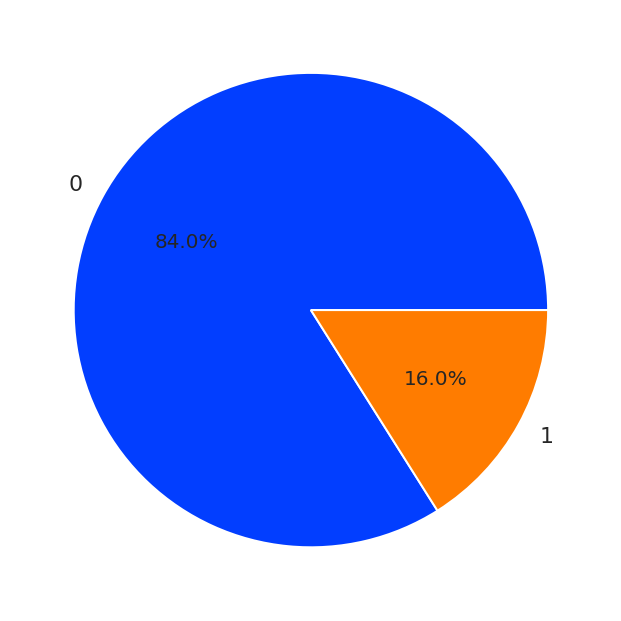

In [10]:
#baseline data
train_count = pd.Series(y_train).value_counts()
test_count = pd.Series(y_test).value_counts()


plt.figure(figsize=(12,12))
plt.subplot(211)
plt.suptitle('Compare Customer Existed and Churn',fontsize=14,fontweight="bold")
plt.pie(train_count,labels=train_count.index,autopct='%1.1f%%')
plt.legend(labels=['No','Yes'])
plt.show()

plt.figure(figsize=(12,12))
plt.subplot(212)
plt.pie(test_count,labels=test_count.index,autopct='%1.1f%%')
plt.show()

Perbandingan customer yang telah churn dan existed adalah 4:21, perbandingan imbalance dan cukup ekstreme

In [11]:
X_train.shape

(8101, 19)

In [12]:
X_train["attrition_flag"] = y_train

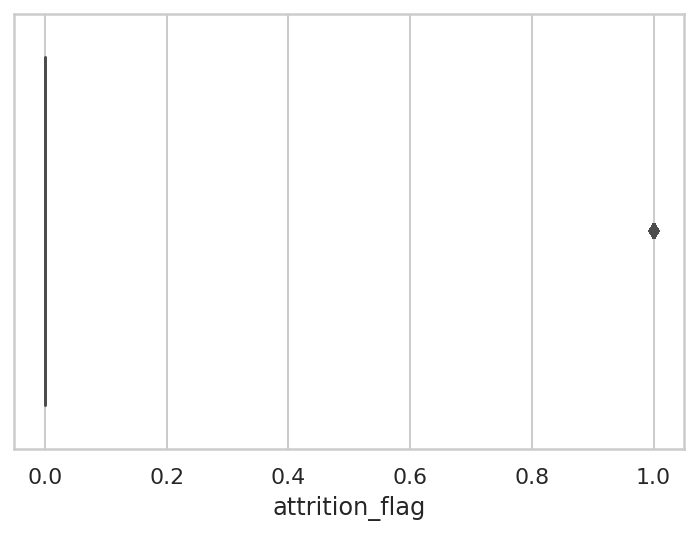

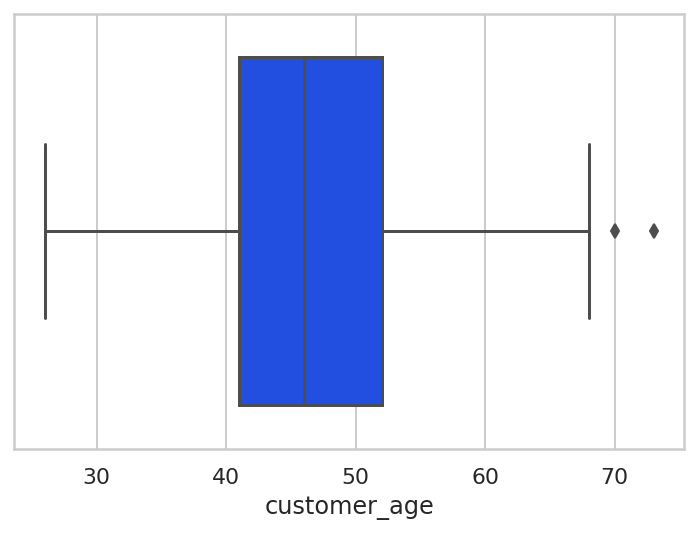

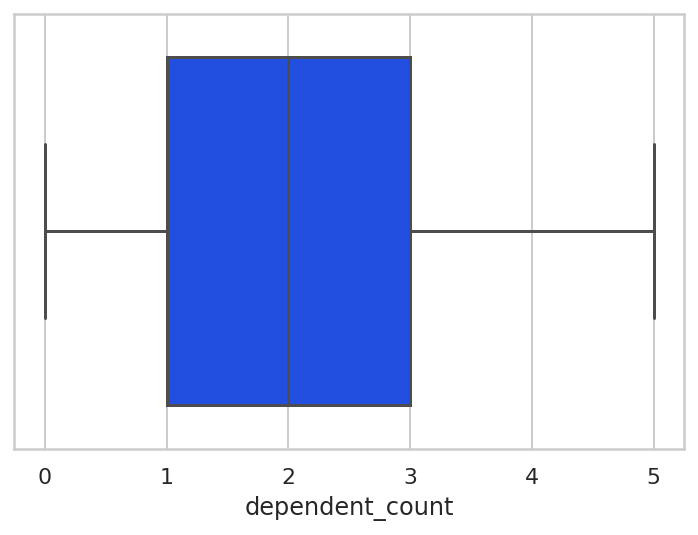

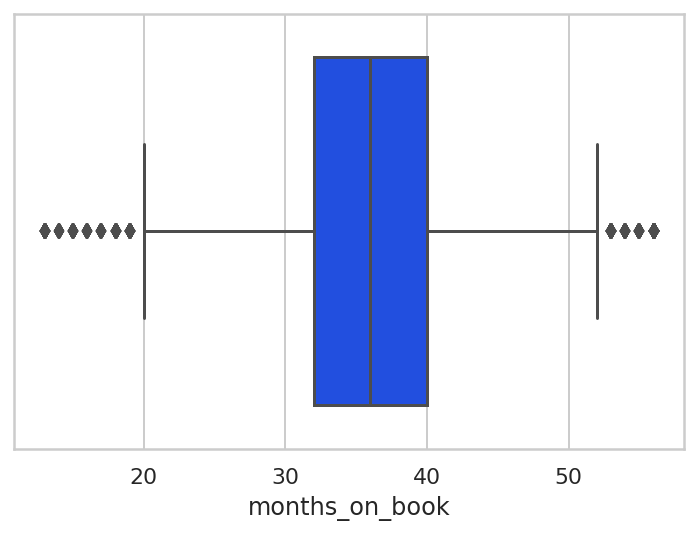

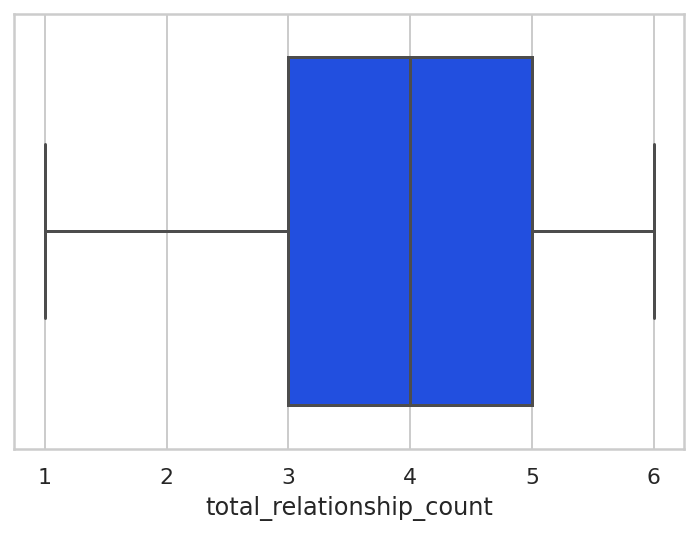

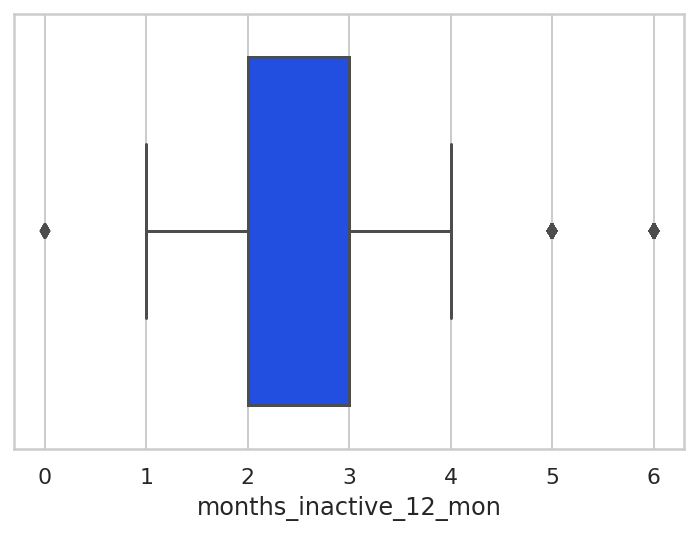

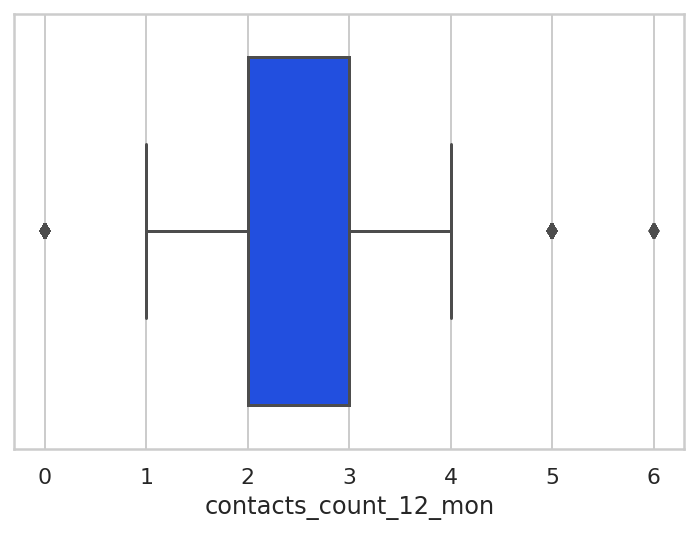

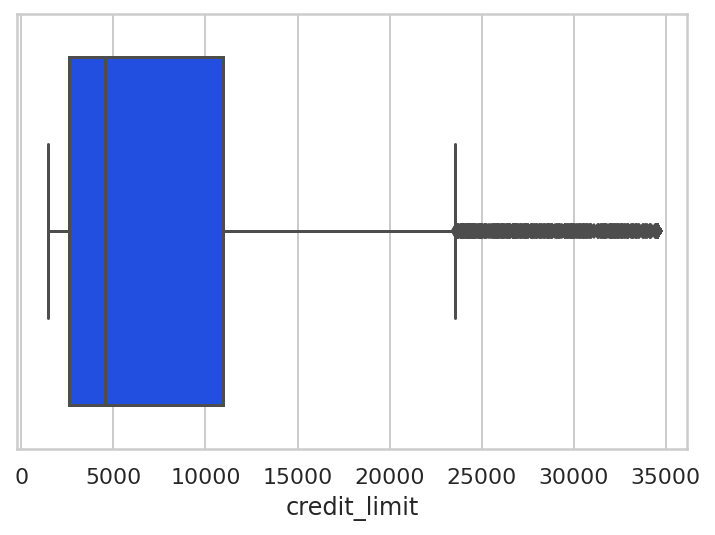

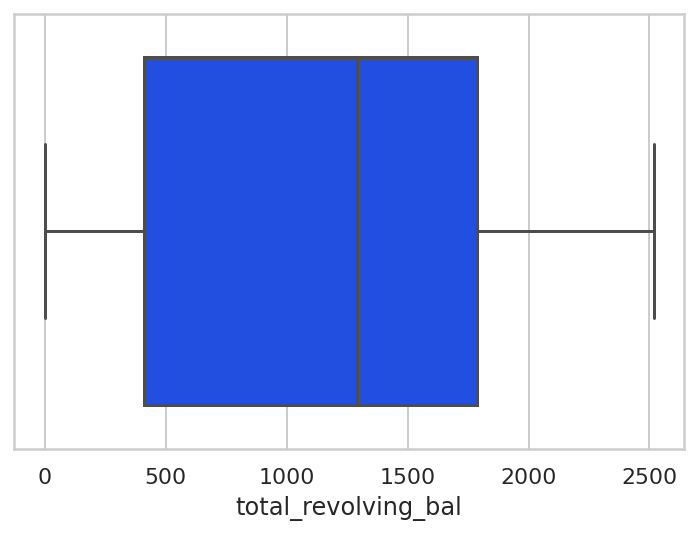

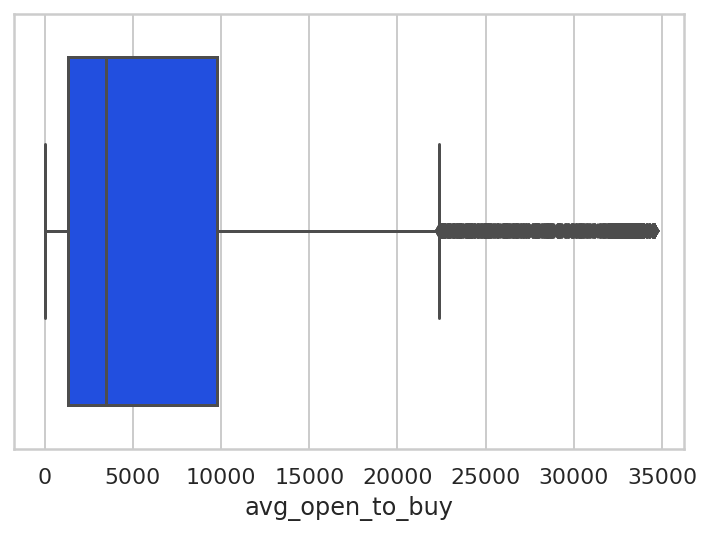

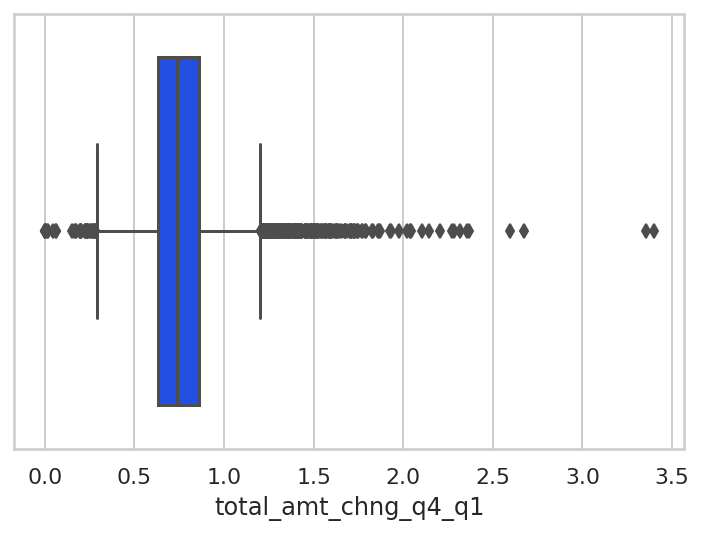

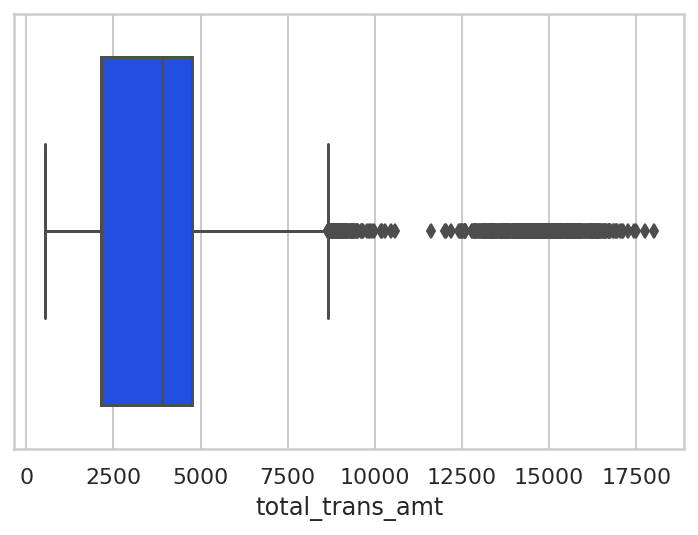

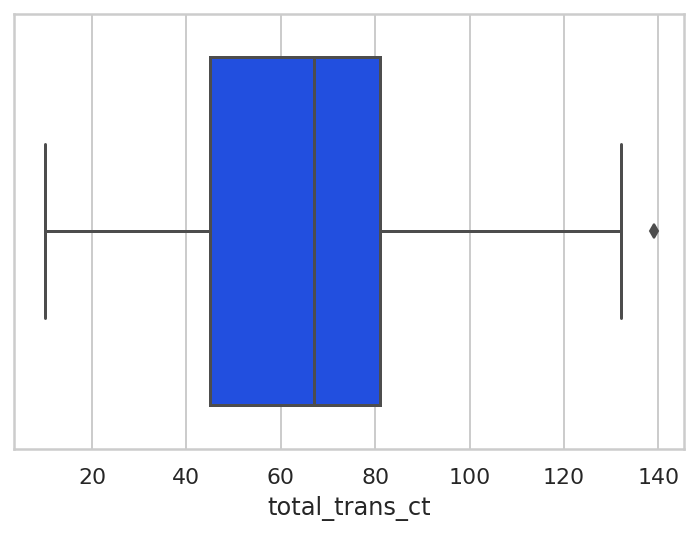

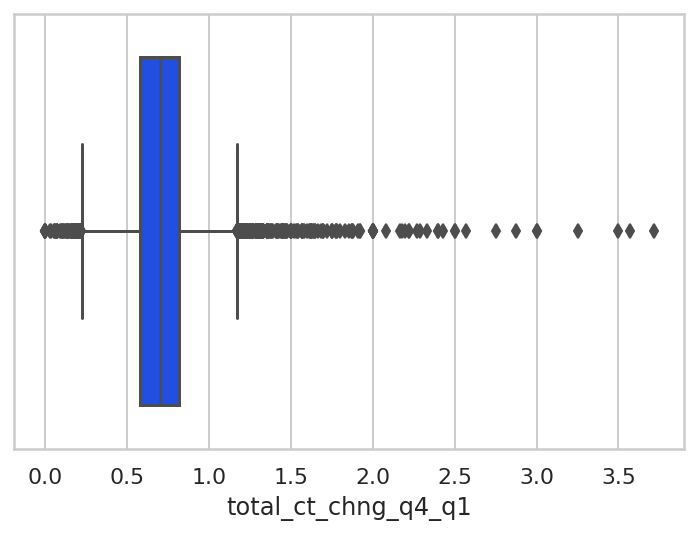

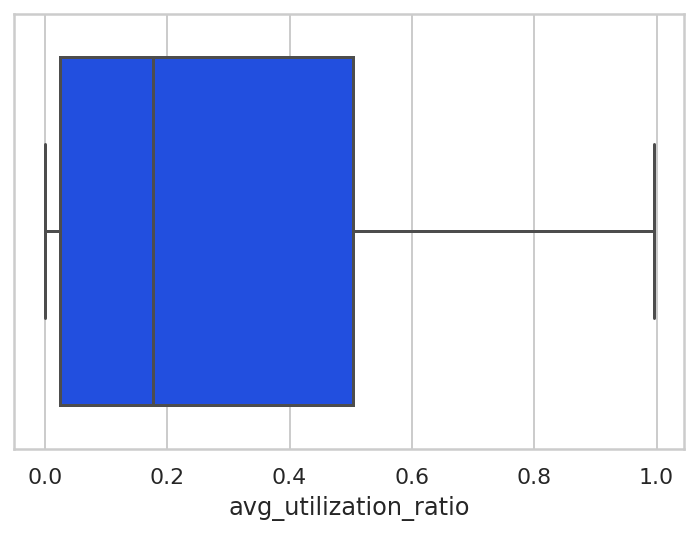

In [13]:
#check outliers
num = df.select_dtypes(exclude="object").columns


for x in num:
  plt.figure()
  sns.boxplot(data=X_train,x=X_train[x])

Observasi : <br>
1.kolom yang memiliki outliers adalah credit_limit,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1 <br>
2.kolom credit_limit memiliki outliers karena Limit kartu kredit adalah batas maksimal nominal transaksi per bulan yang dapat digunakan oleh nasabah. Tiap-tiap bank memiliki kebijakan yang berbeda mengenai limit pada kartu kredit nasabahnya, tergantung pada kondisi finansial, layanan, dan jenis kartu. sehingga outliers disini adalah hal yang wajar. <br>

## Seperti apa distribusi usia para nasabah? Usia manakah yang cenderung memiliki kemungkinan churn terbesar?

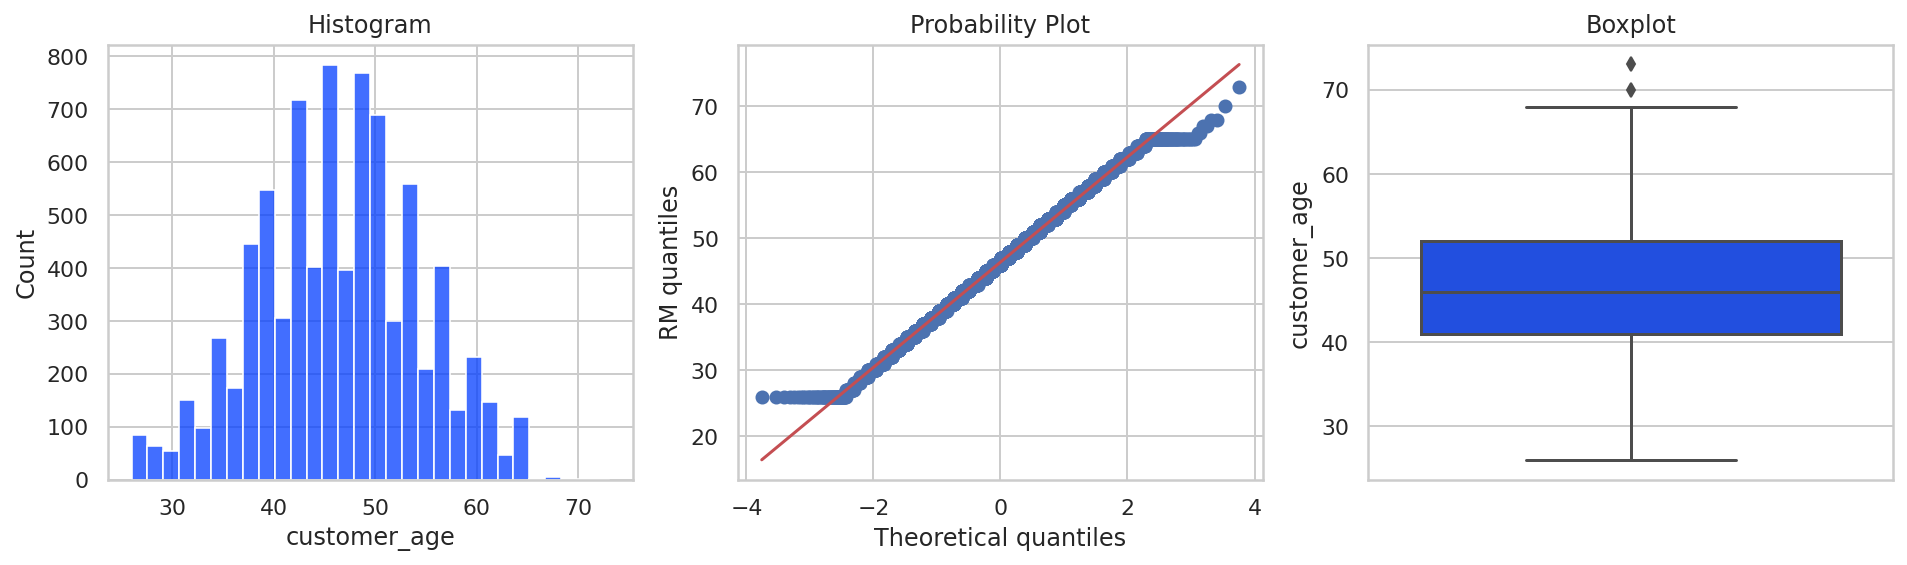

In [14]:
diagnostic_plots(X_train,"customer_age")

distribusi umur dari customer merupakan distribusi yang normal

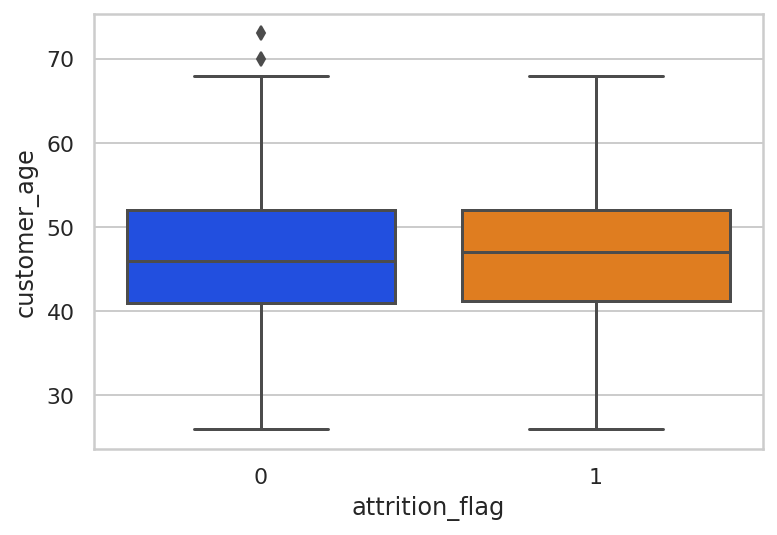

In [15]:
sns.boxplot(data=X_train,x="attrition_flag",y='customer_age')

secara median terlihat bahwa umur customer yang churn lebih tinggi dibandingkan customer yang tidak churn

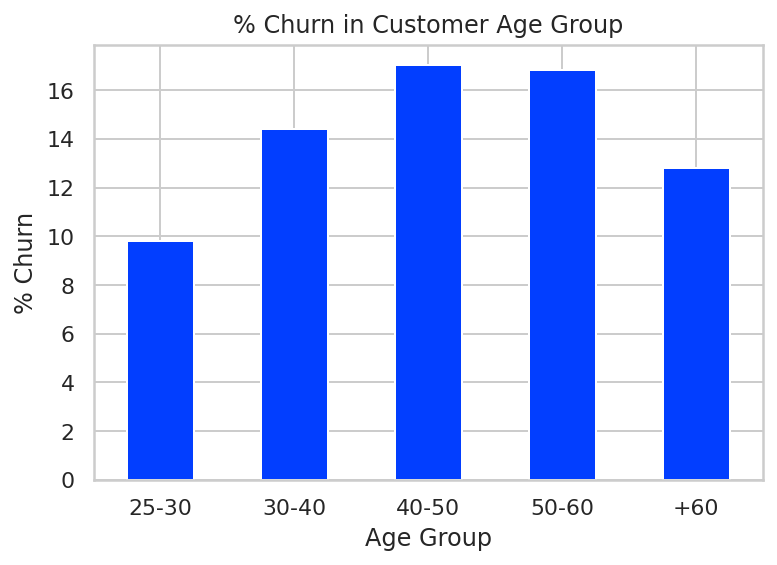

In [16]:
X_train["customer_age_bin"] = pd.cut(X_train['customer_age'],bins=[25,30,40,50,60,73],labels=['25-30','30-40','40-50','50-60',"+60"])

(X_train.groupby("customer_age_bin")["attrition_flag"].mean()*100).plot(kind="bar").set_title("% Churn in Customer Age Group")
plt.ylabel("% Churn")
plt.xlabel("Age Group")
plt.xticks(rotation=0);

bedasarkan kelompok umur, persentase churn yang besar berada pada kelompok 40-50 dan 50-60 tahun

## Apakah terdapat korelasi antara tingkat pendidikan dan income category?

Less than $40K    0.349586
$40K - $60K       0.178990
$80K - $120K      0.149241
$60K - $80K       0.140230
Unknown           0.109369
$120K +           0.072584
Name: income_category, dtype: float64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

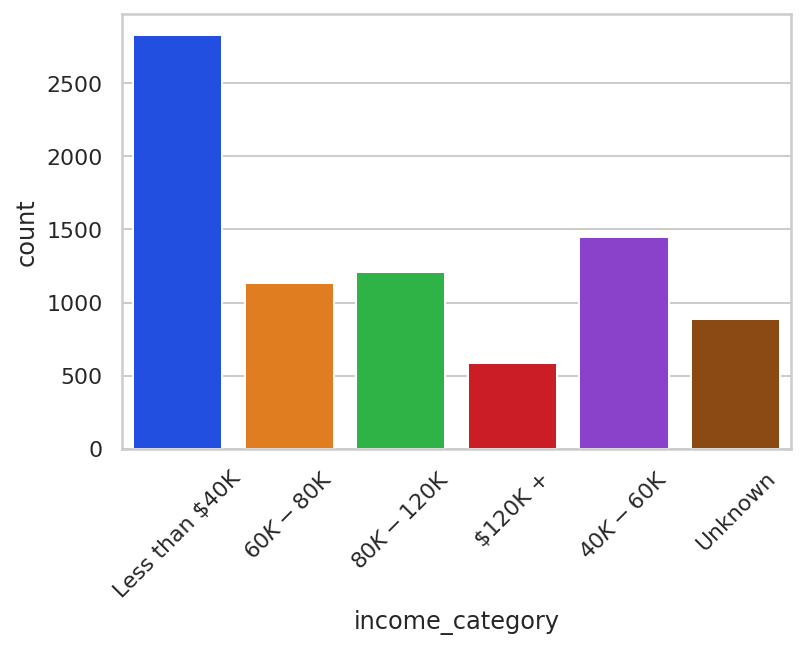

In [17]:
print(X_train["income_category"].value_counts()/len(X_train))
sns.countplot(data=X_train,x='income_category')
plt.xticks(rotation=45)

cukup banyak nasabah yang memiliki catatan income tidak diketahui (unknown) sebesar 10% dari populasi. untuk mengukur korelasi antara income dengan education level maka unknown akan di take out terlebih dahulu

In [18]:
X_train["income_category"].unique()

array(['Less than $40K', '$60K - $80K', '$80K - $120K', '$120K +',
       '$40K - $60K', 'Unknown'], dtype=object)

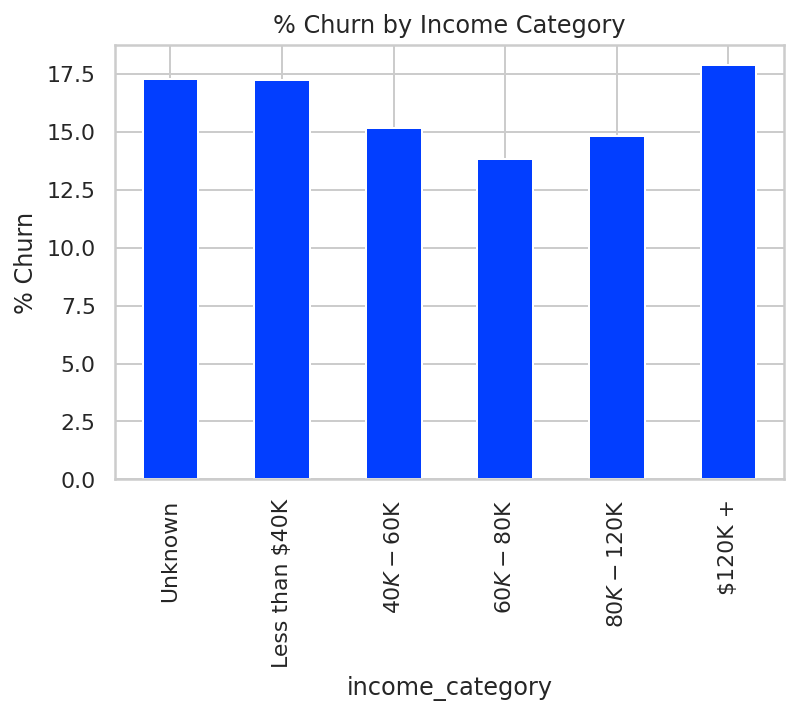

In [19]:
order_income = ['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +']
(X_train.groupby("income_category")["attrition_flag"].mean()*100).loc[order_income].plot(kind='bar').set_title("% Churn by Income Category")
plt.ylabel("% Churn")
plt.show()

In [20]:
income_edu = X_train[X_train['income_category'] != 'Unknown'].copy()
income_edu = income_edu[income_edu['education_level'] != 'Unknown']
income_edu.head()

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,attrition_flag,customer_age_bin
user_id,,,,,,,,,,,,,,,,,,,,,
718279008,44,M,3,High School,Single,$60K - $80K,Silver,36,5,2,3,25276.0,0,25276.0,0.849,2282,38,0.583,0.000,1,40-50
771338658,46,M,2,High School,Married,$80K - $120K,Blue,30,6,3,1,11670.0,915,10755.0,0.892,4277,89,0.854,0.078,0,40-50
714529233,36,F,2,Graduate,Married,Less than $40K,Blue,24,3,1,3,3124.0,1593,1531.0,0.869,1652,41,0.367,0.510,0,30-40
717582558,50,M,1,Graduate,Single,$120K +,Blue,40,4,2,3,34516.0,1185,33331.0,0.725,3874,72,0.714,0.034,0,40-50
708633783,43,M,3,Uneducated,Single,$80K - $120K,Blue,30,3,2,4,11336.0,0,11336.0,0.691,1809,39,0.345,0.000,1,40-50


In [21]:
X_train['income_category'].unique()

array(['Less than $40K', '$60K - $80K', '$80K - $120K', '$120K +',
       '$40K - $60K', 'Unknown'], dtype=object)

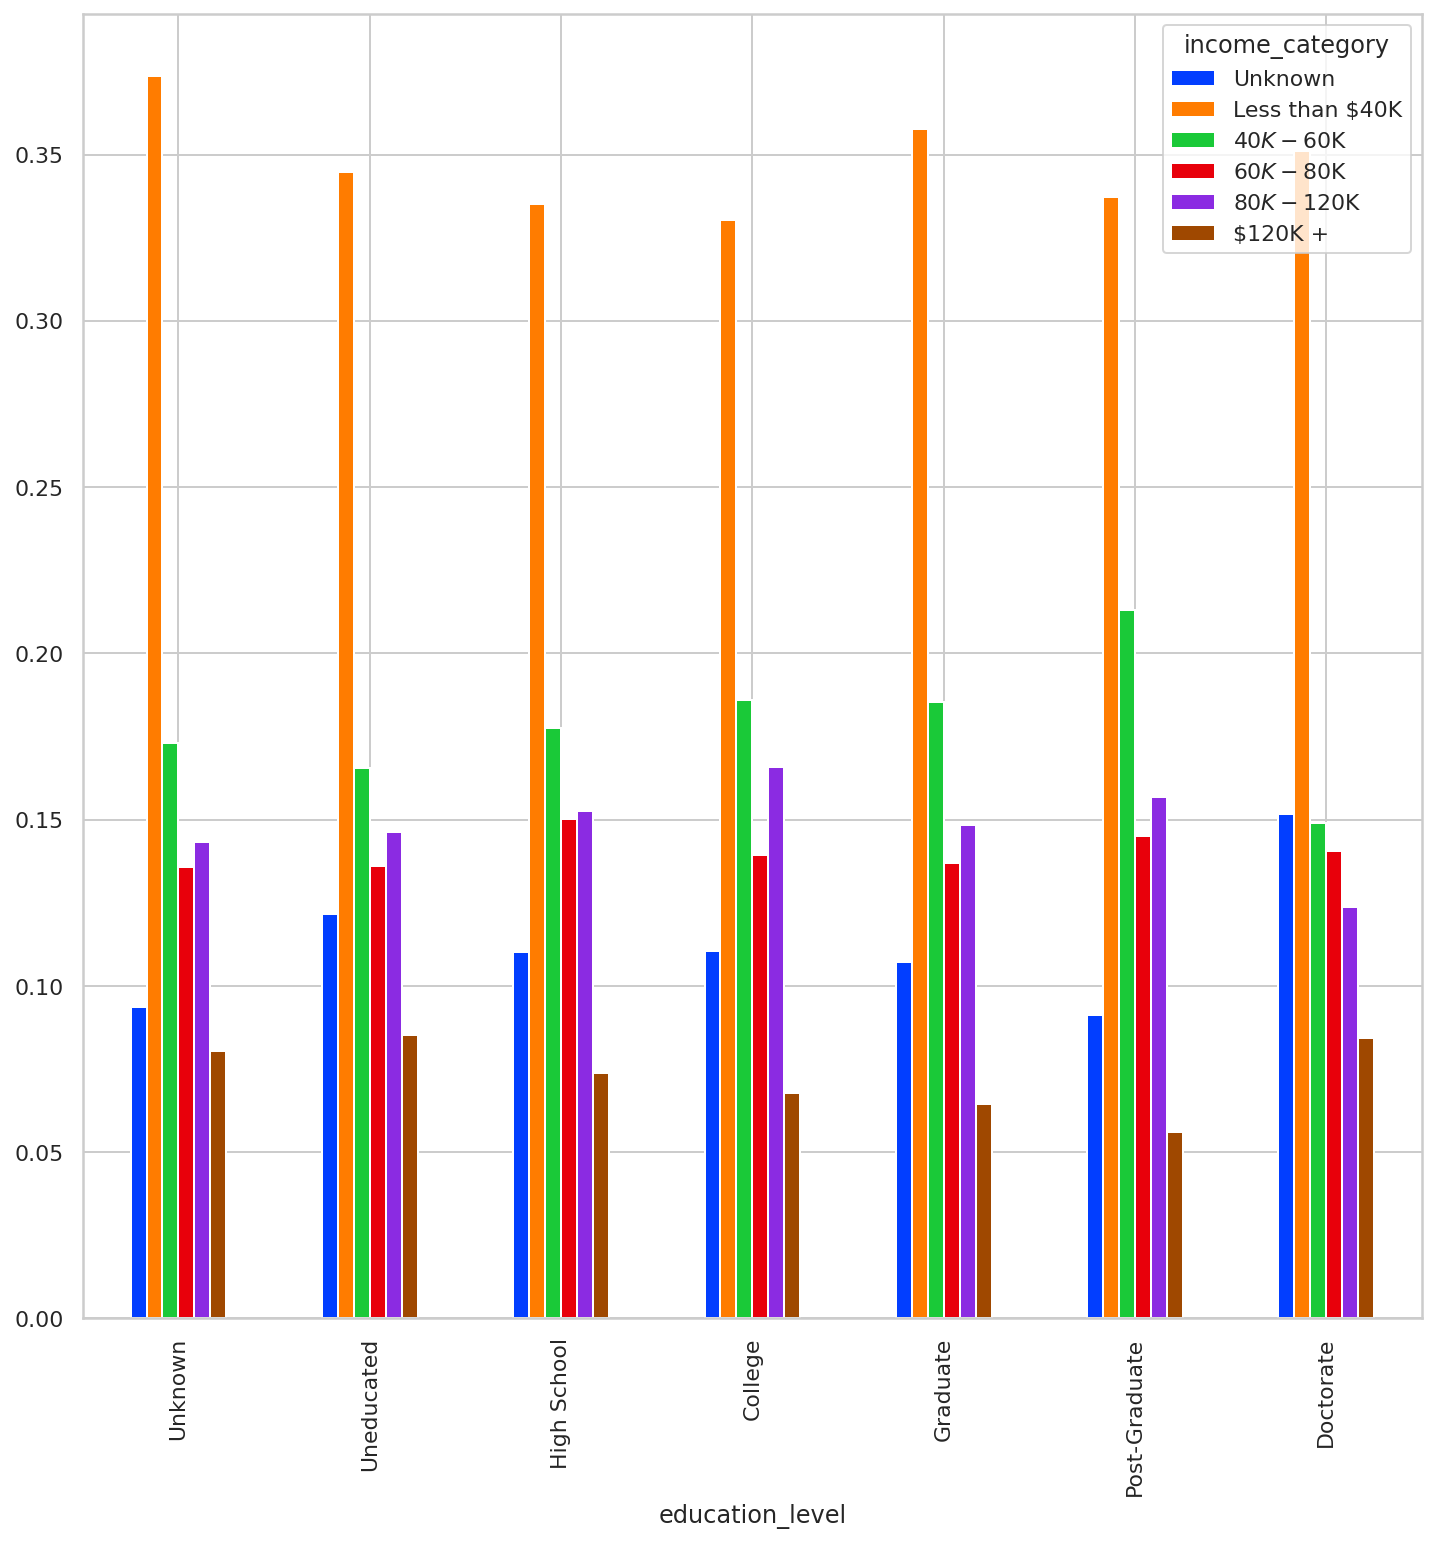

In [22]:
edu_inc = pd.crosstab(X_train["education_level"],X_train['income_category']).apply(lambda x:x/x.sum(),axis=1).reindex(["$120K +","$40K - $60K","$60K - $80K",
                                                                                                             "$80K - $120K","Less than $40K","Unknown"],axis="columns")\
                                                                                                             [["Unknown","Less than $40K","$40K - $60K",
                                                                                                               "$60K - $80K","$80K - $120K","$120K +"]]
order_edu = ['Unknown','Uneducated','High School','College','Graduate','Post-Graduate',
             'Doctorate']



edu_inc.loc[order_edu].plot(kind="bar",figsize=(12,12))                                                                                                           

sebaran income terlihat acak dengan tingkat edukasi sepertinya tidak terdapat korelasi antara income dengan tingkat edukasi

In [23]:
income_edu["education_level"] = income_edu["education_level"].replace(['High School', 'Doctorate', 'College', 'Graduate', 'Uneducated','Post-Graduate'],
                                                                      [1,5,2,3,0,4])
income_edu["income_category"] = income_edu["income_category"].replace(['$80K - $120K', '$40K - $60K', 'Less than $40K', '$120K +','$60K - $80K'],
                                                                      [4,2,1,5,3])

In [24]:
#correlation test education and income
#Ho : tidak ada korelasi income dan level edukasi
#H1 : terdapat korelasi income dan level edukasi

from scipy.stats import kendalltau
(tau,pvalue) = kendalltau(income_edu["education_level"],income_edu["income_category"])

print(f"Tau correlation coefficient {tau}")
print(f'P-value test {pvalue}')

Tau correlation coefficient -0.017663758224775124
P-value test 0.09162350906970575


Dari hasil uji hiphotesis testing kendall tau, tidak terdapat hubungan antara income dan tingkat edukasi

## Bagaimana korelasi dari kedua prediktor tersebut terhadap churn?

Text(0, 0.5, '% Churn')

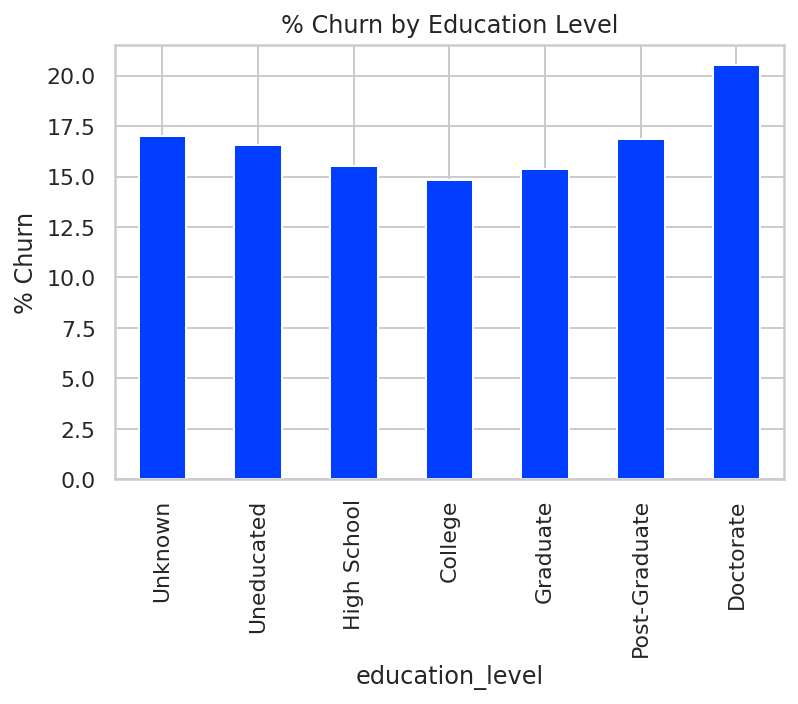

In [25]:
#education level
order_edu = ['Unknown','Uneducated','High School','College','Graduate','Post-Graduate',
             'Doctorate']

(X_train.groupby("education_level")["attrition_flag"].mean()*100).loc[order_edu].plot(kind='bar').set_title("% Churn by Education Level")
plt.ylabel("% Churn")

Jika diperhatikan, hubungan education level berkolerasi secara non linear, 
ketika education level lulusan sarjana keatas persentase churn semakin tinggi

In [26]:
#income category
X_train["income_category"].unique()

array(['Less than $40K', '$60K - $80K', '$80K - $120K', '$120K +',
       '$40K - $60K', 'Unknown'], dtype=object)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

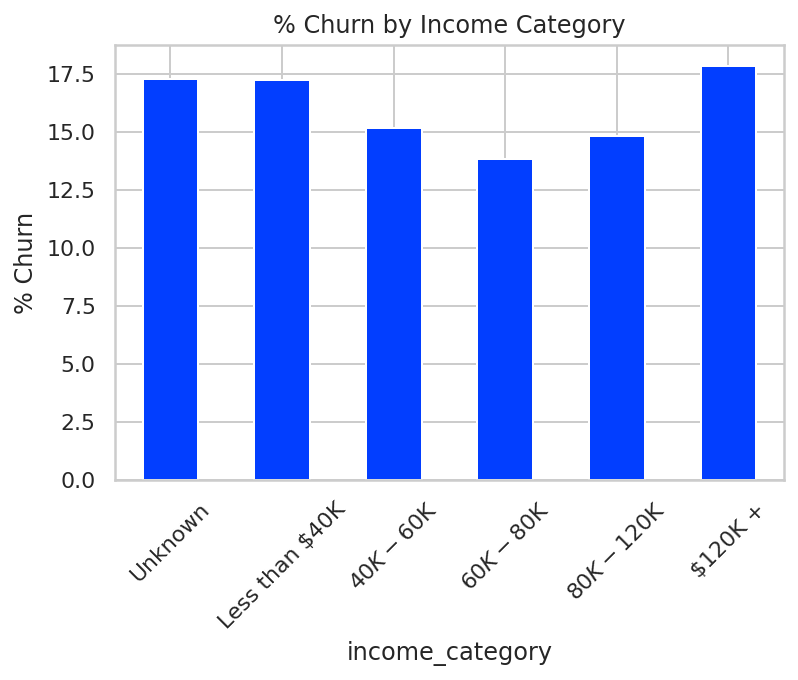

In [27]:
order_income = ['Unknown','Less than $40K','$40K - $60K',
                '$60K - $80K', '$80K - $120K', '$120K +']

(X_train.groupby("income_category")["attrition_flag"].mean()*100).loc[order_income].plot(kind='bar').set_title("% Churn by Income Category")
plt.ylabel("% Churn")
plt.xticks(rotation=45)

hubungan antara income category dan churn juga terlihat tidak linear, nasabah dengan income category berkisar 60 - 80 K sepertinya target yang cukup bagus karena memiliki persentase churn yang kecil

## Apakah terdapat perbedaan yang signifikan antara gender dengan kemungkinan nasabah untuk churn?

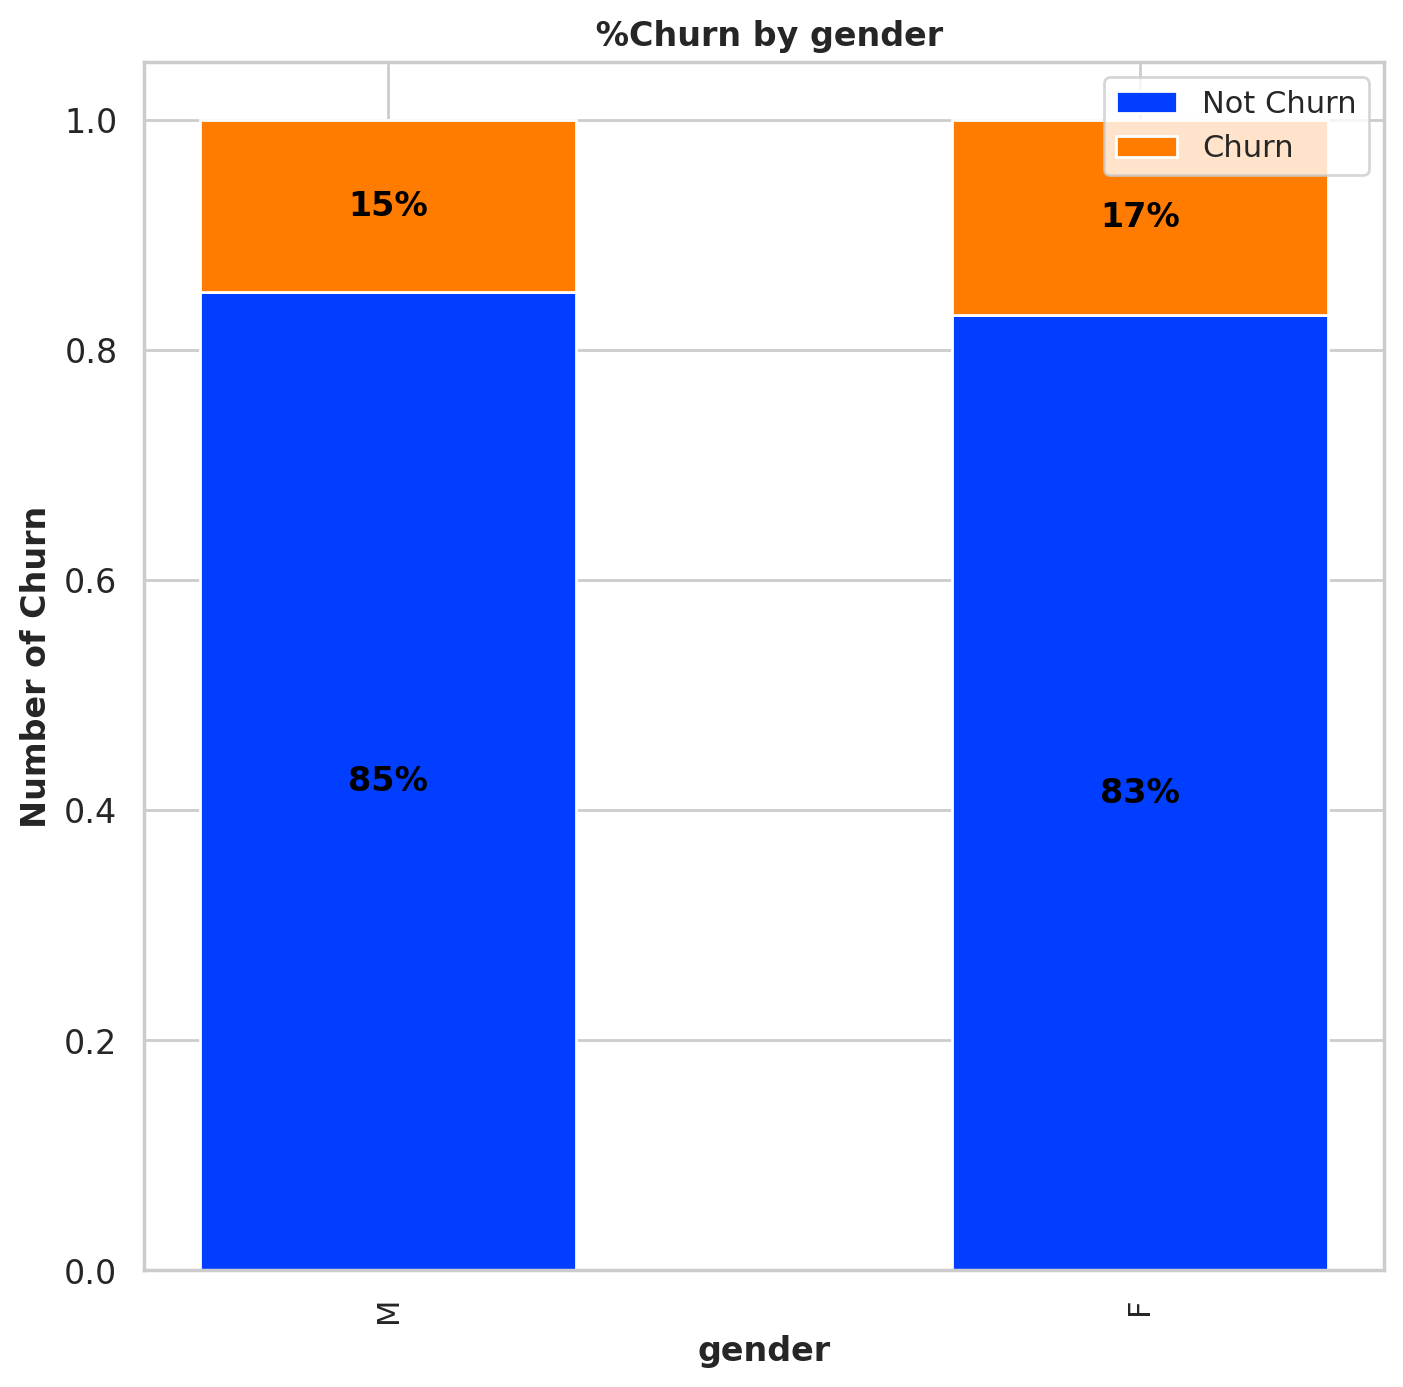

In [28]:
create_stacked_bar_percent(df,'gender')

dari segi percentase, gender perempuan lebih besar dari laki laki, perempuan memiliki tingkat churn sebesar 17% sedangkan laki laki memiliki tingkat churn sebesar 15%. akan dibuktikan apakah perbedaannya signifikan secara statistik

In [29]:
from scipy.stats import chi2_contingency
gender_churn = pd.crosstab(X_train.gender,X_train.attrition_flag)

#uji hipothesis
Ho = "tidak terdapat perbedaan signifikant churn pada gender"
H1= "terdapat perbedaan signifikant churn pada gender"

c, p, dof, expected = chi2_contingency(gender_churn)

if p<0.05:
    print(H1,"karena p value kurang dari 0.05, p value is {}".format(p))
else:
    print(Ho,"karena p value lebih dari 0.05, p value is {}".format(p))

terdapat perbedaan signifikant churn pada gender karena p value kurang dari 0.05, p value is 0.00017632820436671044


terdapat perbedaan siginifikan secara statistik antara gender dan churn

## Apakah semakin lama customer menjadi nasabah maka semakin kecil kemungkinan nasabah tersebut untuk churn?

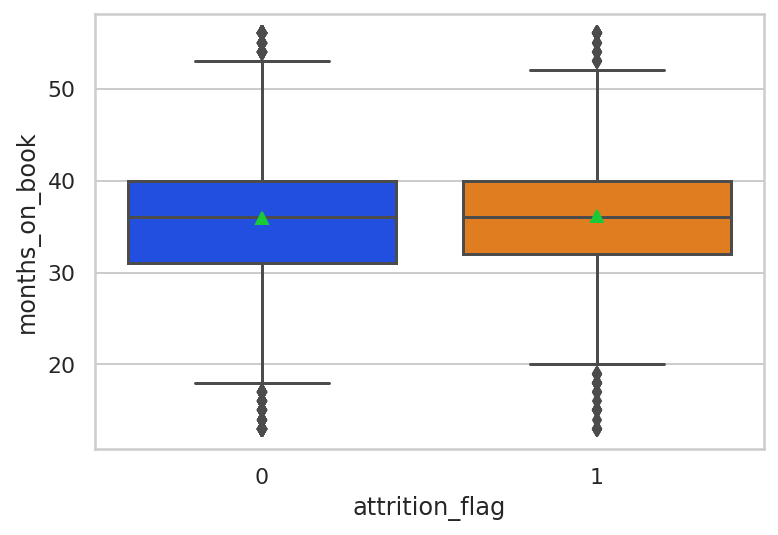

In [30]:
sns.boxplot(data=X_train,x="attrition_flag",y="months_on_book",showmeans=True)

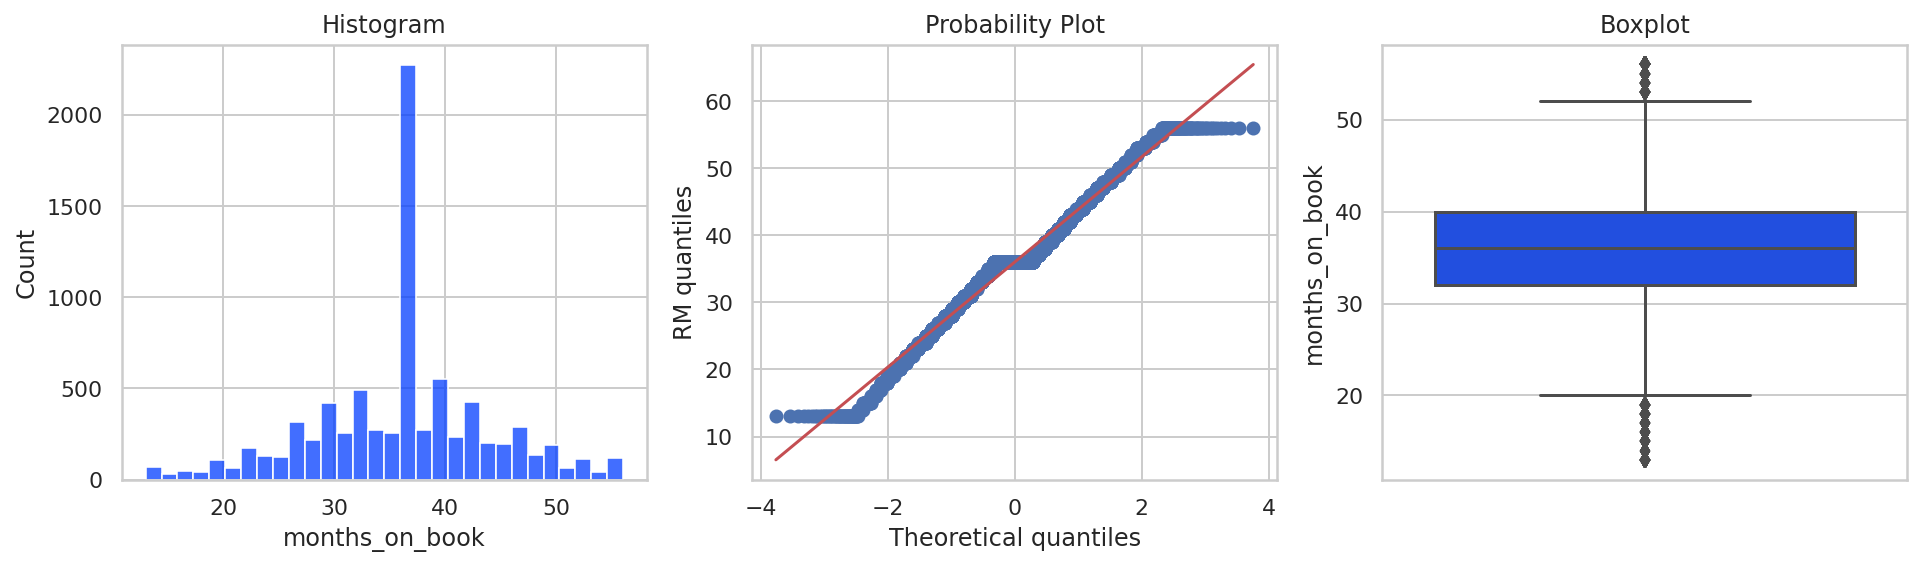

In [31]:
diagnostic_plots(X_train,'months_on_book')

secara QQ plot data monhts_on_book berdistribusi normal

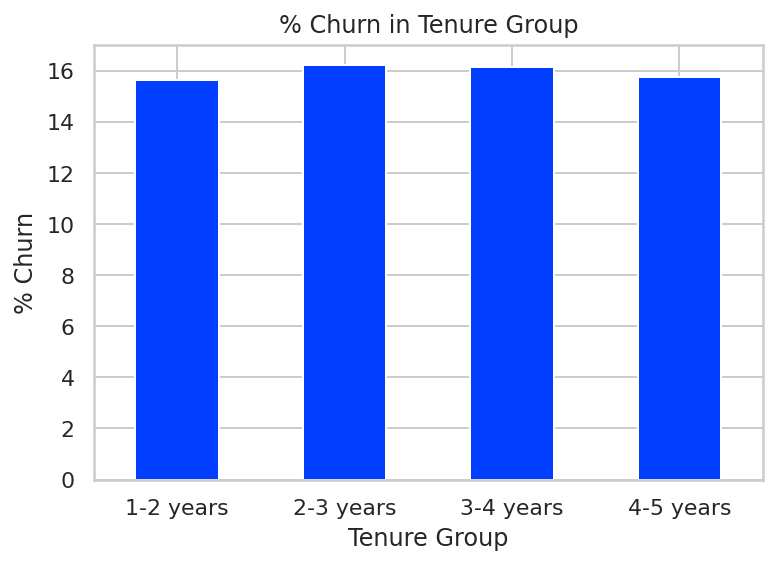

In [32]:
X_train["year_on_book_cat"] = pd.cut(X_train['months_on_book'],bins=[13,24,36,48,56],labels=['1-2 years','2-3 years','3-4 years',"4-5 years"])
(X_train.groupby("year_on_book_cat")["attrition_flag"].mean()*100).plot(kind='bar').set_title("% Churn in Tenure Group")
plt.ylabel("% Churn")
plt.ylim(0)
plt.xlabel("Tenure Group")
plt.xticks(rotation=0);

In [33]:
from scipy.stats import spearmanr
(sphr,pvalue) = spearmanr(X_train["months_on_book"],X_train["attrition_flag"])

print(f"spearman correlation coefficient {sphr}")
print(f'P-value test {pvalue}')

spearman correlation coefficient 0.00999520665514895
P-value test 0.36838225921129175


dari korelasi memiliki nilai yang sangat kecil dan hampir bernilai 0

## Apakah semakin sering customer berinteraksi dengan bank dalam 1 tahun terakhir mempengaruhi besar atau kecilnya kemungkinan nasabah untuk churn?

In [34]:
X_train.groupby("contacts_count_12_mon").agg({"attrition_flag":[len,"sum",'mean']})

attrition_flag               
                                 len  sum      mean
contacts_count_12_mon                              
0                                328    5  0.015244
1                               1195   85  0.071130
2                               2563  321  0.125244
3                               2712  546  0.201327
4                               1114  255  0.228905
5                                147   48  0.326531
6                                 42   42  1.000000

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

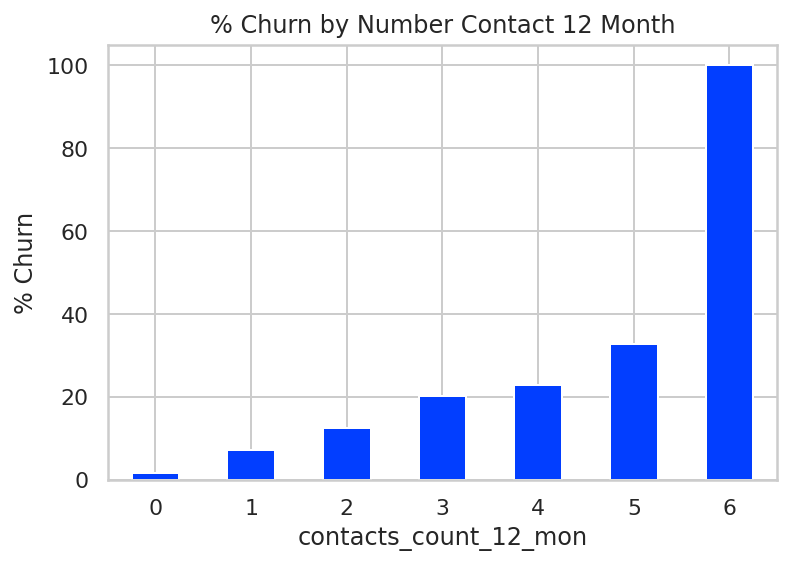

In [35]:
(X_train.groupby("contacts_count_12_mon")["attrition_flag"].mean()*100).plot(kind="bar").set_title("% Churn by Number Contact 12 Month")
plt.ylabel("% Churn")
plt.xticks(rotation=0)

terlihat semakin sering customer yang berinteraksi dengan bank dalam 1 tahun terakhir, semakin meningkat persentase churn customer, persentase churn meningkat pesat ketika jumlah interaksi sebanyak 6

In [36]:
(sphr,pvalue) = spearmanr(X_train["contacts_count_12_mon"],X_train["attrition_flag"])

print(f"spearman correlation coefficient {sphr}")
print(f'P-value test {pvalue}')

spearman correlation coefficient 0.19061225981829608
P-value test 3.788112996145303e-67


# Eksplonatory Part 2

In [37]:
X_train.head()

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,attrition_flag,customer_age_bin,year_on_book_cat
user_id,,,,,,,,,,,,,,,,,,,,,,
787504158,36,F,0,Unknown,Married,Less than $40K,Blue,24,4,3,2,2570.0,2230,340.0,0.686,1755,42,0.448,0.868,0,30-40,1-2 years
718279008,44,M,3,High School,Single,$60K - $80K,Silver,36,5,2,3,25276.0,0,25276.0,0.849,2282,38,0.583,0.000,1,40-50,2-3 years
771338658,46,M,2,High School,Married,$80K - $120K,Blue,30,6,3,1,11670.0,915,10755.0,0.892,4277,89,0.854,0.078,0,40-50,2-3 years
714529233,36,F,2,Graduate,Married,Less than $40K,Blue,24,3,1,3,3124.0,1593,1531.0,0.869,1652,41,0.367,0.510,0,30-40,1-2 years
717582558,50,M,1,Graduate,Single,$120K +,Blue,40,4,2,3,34516.0,1185,33331.0,0.725,3874,72,0.714,0.034,0,40-50,3-4 years


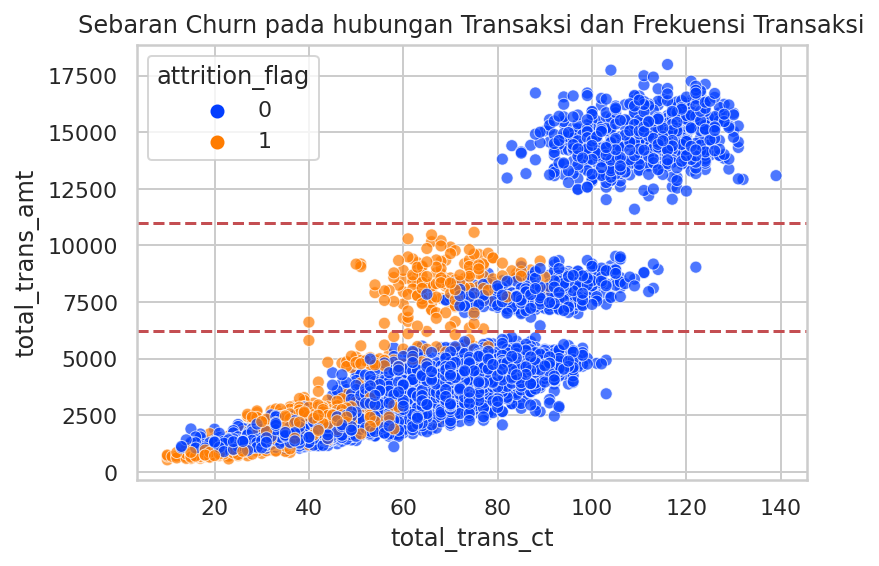

In [38]:
sns.scatterplot(data=X_train,y="total_trans_amt",x="total_trans_ct",hue='attrition_flag',alpha=0.7).set_title("Sebaran Churn pada hubungan Transaksi dan Frekuensi Transaksi")
plt.axhline(y=6200,linestyle="--",color="r")
plt.axhline(y=11000,linestyle="--",color="r")

Hubungan frekuensi transaksi dan nominal transaksi berupa ekspnonential.<br>
Terdapat 3 segment berdasarkan scatterplot nominal transaksi dan frekuensi transaksi.<br>
Nasabah yang meninggalkan bank memiliki nominal transaksi dibawah 11000 dan frekuensinya di bawah 90.


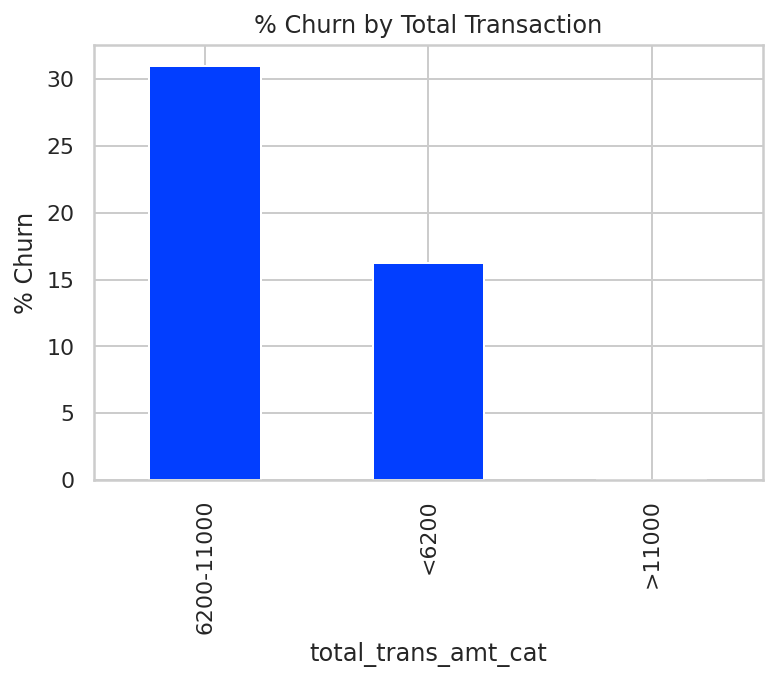

In [41]:
amt_amount_cat = []

for x in X_train["total_trans_amt"]:
  if x <6200:
    amt_amount_cat.append("<6200")
  elif x<11000:
    amt_amount_cat.append("6200-11000")
  else:
    amt_amount_cat.append(">11000")

X_train["total_trans_amt_cat"] = amt_amount_cat

(X_train.groupby("total_trans_amt_cat")['attrition_flag'].mean()*100).plot(kind="bar").set_title("% Churn by Total Transaction")
plt.ylabel("% Churn");

terlihat bahwa persentase tertinggi customer churn ketika transfer amount berjumlah antara 6200-11000 dengan persentase 30% dan < 6200 persentase 15%

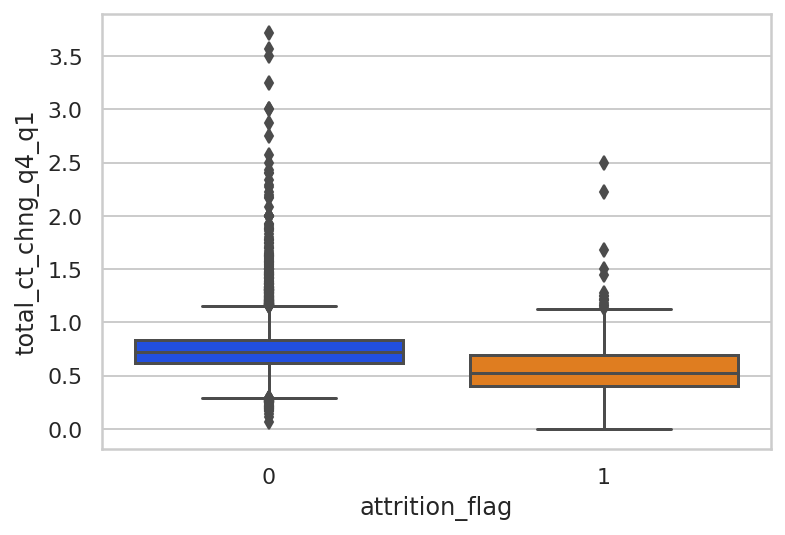

In [42]:
sns.boxplot(data=X_train,x="attrition_flag",y="total_ct_chng_q4_q1")

terdapat perbedaan nilai total ct chng q4 q1, dimana nasabah yang tidak churn lebih tinggi di bandingkan dengan nasabah yang churn

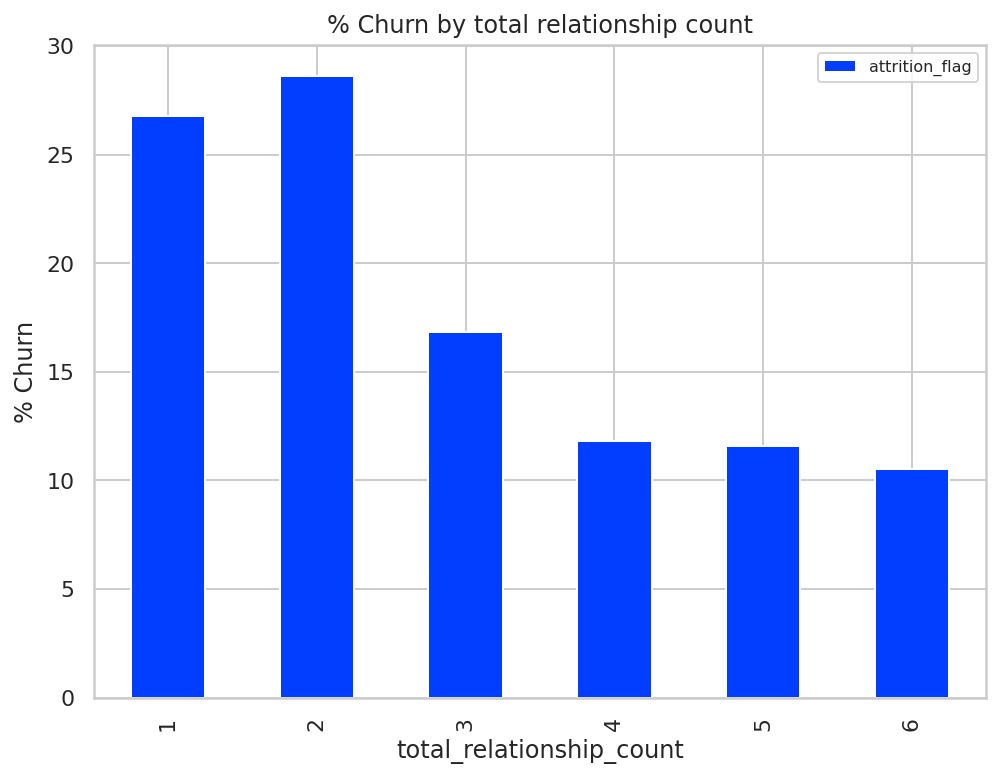

In [43]:
plt.figure(figsize=(8,6))
(X_train.groupby("total_relationship_count")["attrition_flag"].mean()*100).plot(kind='bar').set_title("% Churn by total relationship count")
plt.ylabel("% Churn")
plt.ylim(0)
plt.legend(fontsize=8);

ternyata customer yang menggunakan barang 1 hingga 2 saja dari produk bank memiliki persentase yang tinggi untuk churn tetapi jika sudah lebih dari 2 persentase churn menurun hingga 2x lipat

# Preprocessing

In [44]:
X_train.head()

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,attrition_flag,customer_age_bin,year_on_book_cat,total_trans_amt_cat
user_id,,,,,,,,,,,,,,,,,,,,,,,
787504158,36,F,0,Unknown,Married,Less than $40K,Blue,24,4,3,2,2570.0,2230,340.0,0.686,1755,42,0.448,0.868,0,30-40,1-2 years,<6200
718279008,44,M,3,High School,Single,$60K - $80K,Silver,36,5,2,3,25276.0,0,25276.0,0.849,2282,38,0.583,0.000,1,40-50,2-3 years,<6200
771338658,46,M,2,High School,Married,$80K - $120K,Blue,30,6,3,1,11670.0,915,10755.0,0.892,4277,89,0.854,0.078,0,40-50,2-3 years,<6200
714529233,36,F,2,Graduate,Married,Less than $40K,Blue,24,3,1,3,3124.0,1593,1531.0,0.869,1652,41,0.367,0.510,0,30-40,1-2 years,<6200
717582558,50,M,1,Graduate,Single,$120K +,Blue,40,4,2,3,34516.0,1185,33331.0,0.725,3874,72,0.714,0.034,0,40-50,3-4 years,<6200


In [45]:
X_train['customer_age_bin'].unique()

['30-40', '40-50', '25-30', '50-60', '+60']
Categories (5, object): ['25-30' < '30-40' < '40-50' < '50-60' < '+60']

In [46]:
#====Ordinal Category=======
map_edu = {'Unknown':0,
           'Uneducated':1,
           'High School':2,
           'College':3,
           'Graduate':4,
           'Post-Graduate':5,
           'Doctorate':6}

map_gender = {"M":0,
              "F":1}

map_income = {'Unknown':0,
              'Less than $40K':1,
              '$40K - $60K':2,
              '$60K - $80K':3,
              '$80K - $120K':4,
              '$120K +':5}

map_amt_cat = {'<6200':1,
               '6200-11000':2,
               ">11000":3}

map_age = {'25-30':1,
           '30-40':2,
          '40-50':3,
           '50-60':4,
           '+60':5}


#========Nominal Categoty======
nom_cat = ["marital_status"]
X_train = pd.get_dummies(X_train,columns=nom_cat,drop_first=True)

#====mapping========
X_train["gender"] = X_train["gender"].map(map_gender)
X_train["education_level"] = X_train["education_level"].map(map_edu)
X_train["income_category"] = X_train["income_category"].map(map_income)
X_train["customer_age_bin"] = X_train["customer_age_bin"].map(map_age).astype("int")
X_train["total_trans_amt_cat"] = X_train["total_trans_amt_cat"].map(map_amt_cat)

In [47]:
X_train.head()

,customer_age,gender,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,attrition_flag,customer_age_bin,year_on_book_cat,total_trans_amt_cat,marital_status_Married,marital_status_Single,marital_status_Unknown
user_id,,,,,,,,,,,,,,,,,,,,,,,,,
787504158,36,1,0,0,1,Blue,24,4,3,2,2570.0,2230,340.0,0.686,1755,42,0.448,0.868,0,2,1-2 years,1,1,0,0
718279008,44,0,3,2,3,Silver,36,5,2,3,25276.0,0,25276.0,0.849,2282,38,0.583,0.000,1,3,2-3 years,1,0,1,0
771338658,46,0,2,2,4,Blue,30,6,3,1,11670.0,915,10755.0,0.892,4277,89,0.854,0.078,0,3,2-3 years,1,1,0,0
714529233,36,1,2,4,1,Blue,24,3,1,3,3124.0,1593,1531.0,0.869,1652,41,0.367,0.510,0,2,1-2 years,1,1,0,0
717582558,50,0,1,4,5,Blue,40,4,2,3,34516.0,1185,33331.0,0.725,3874,72,0.714,0.034,0,3,3-4 years,1,0,1,0


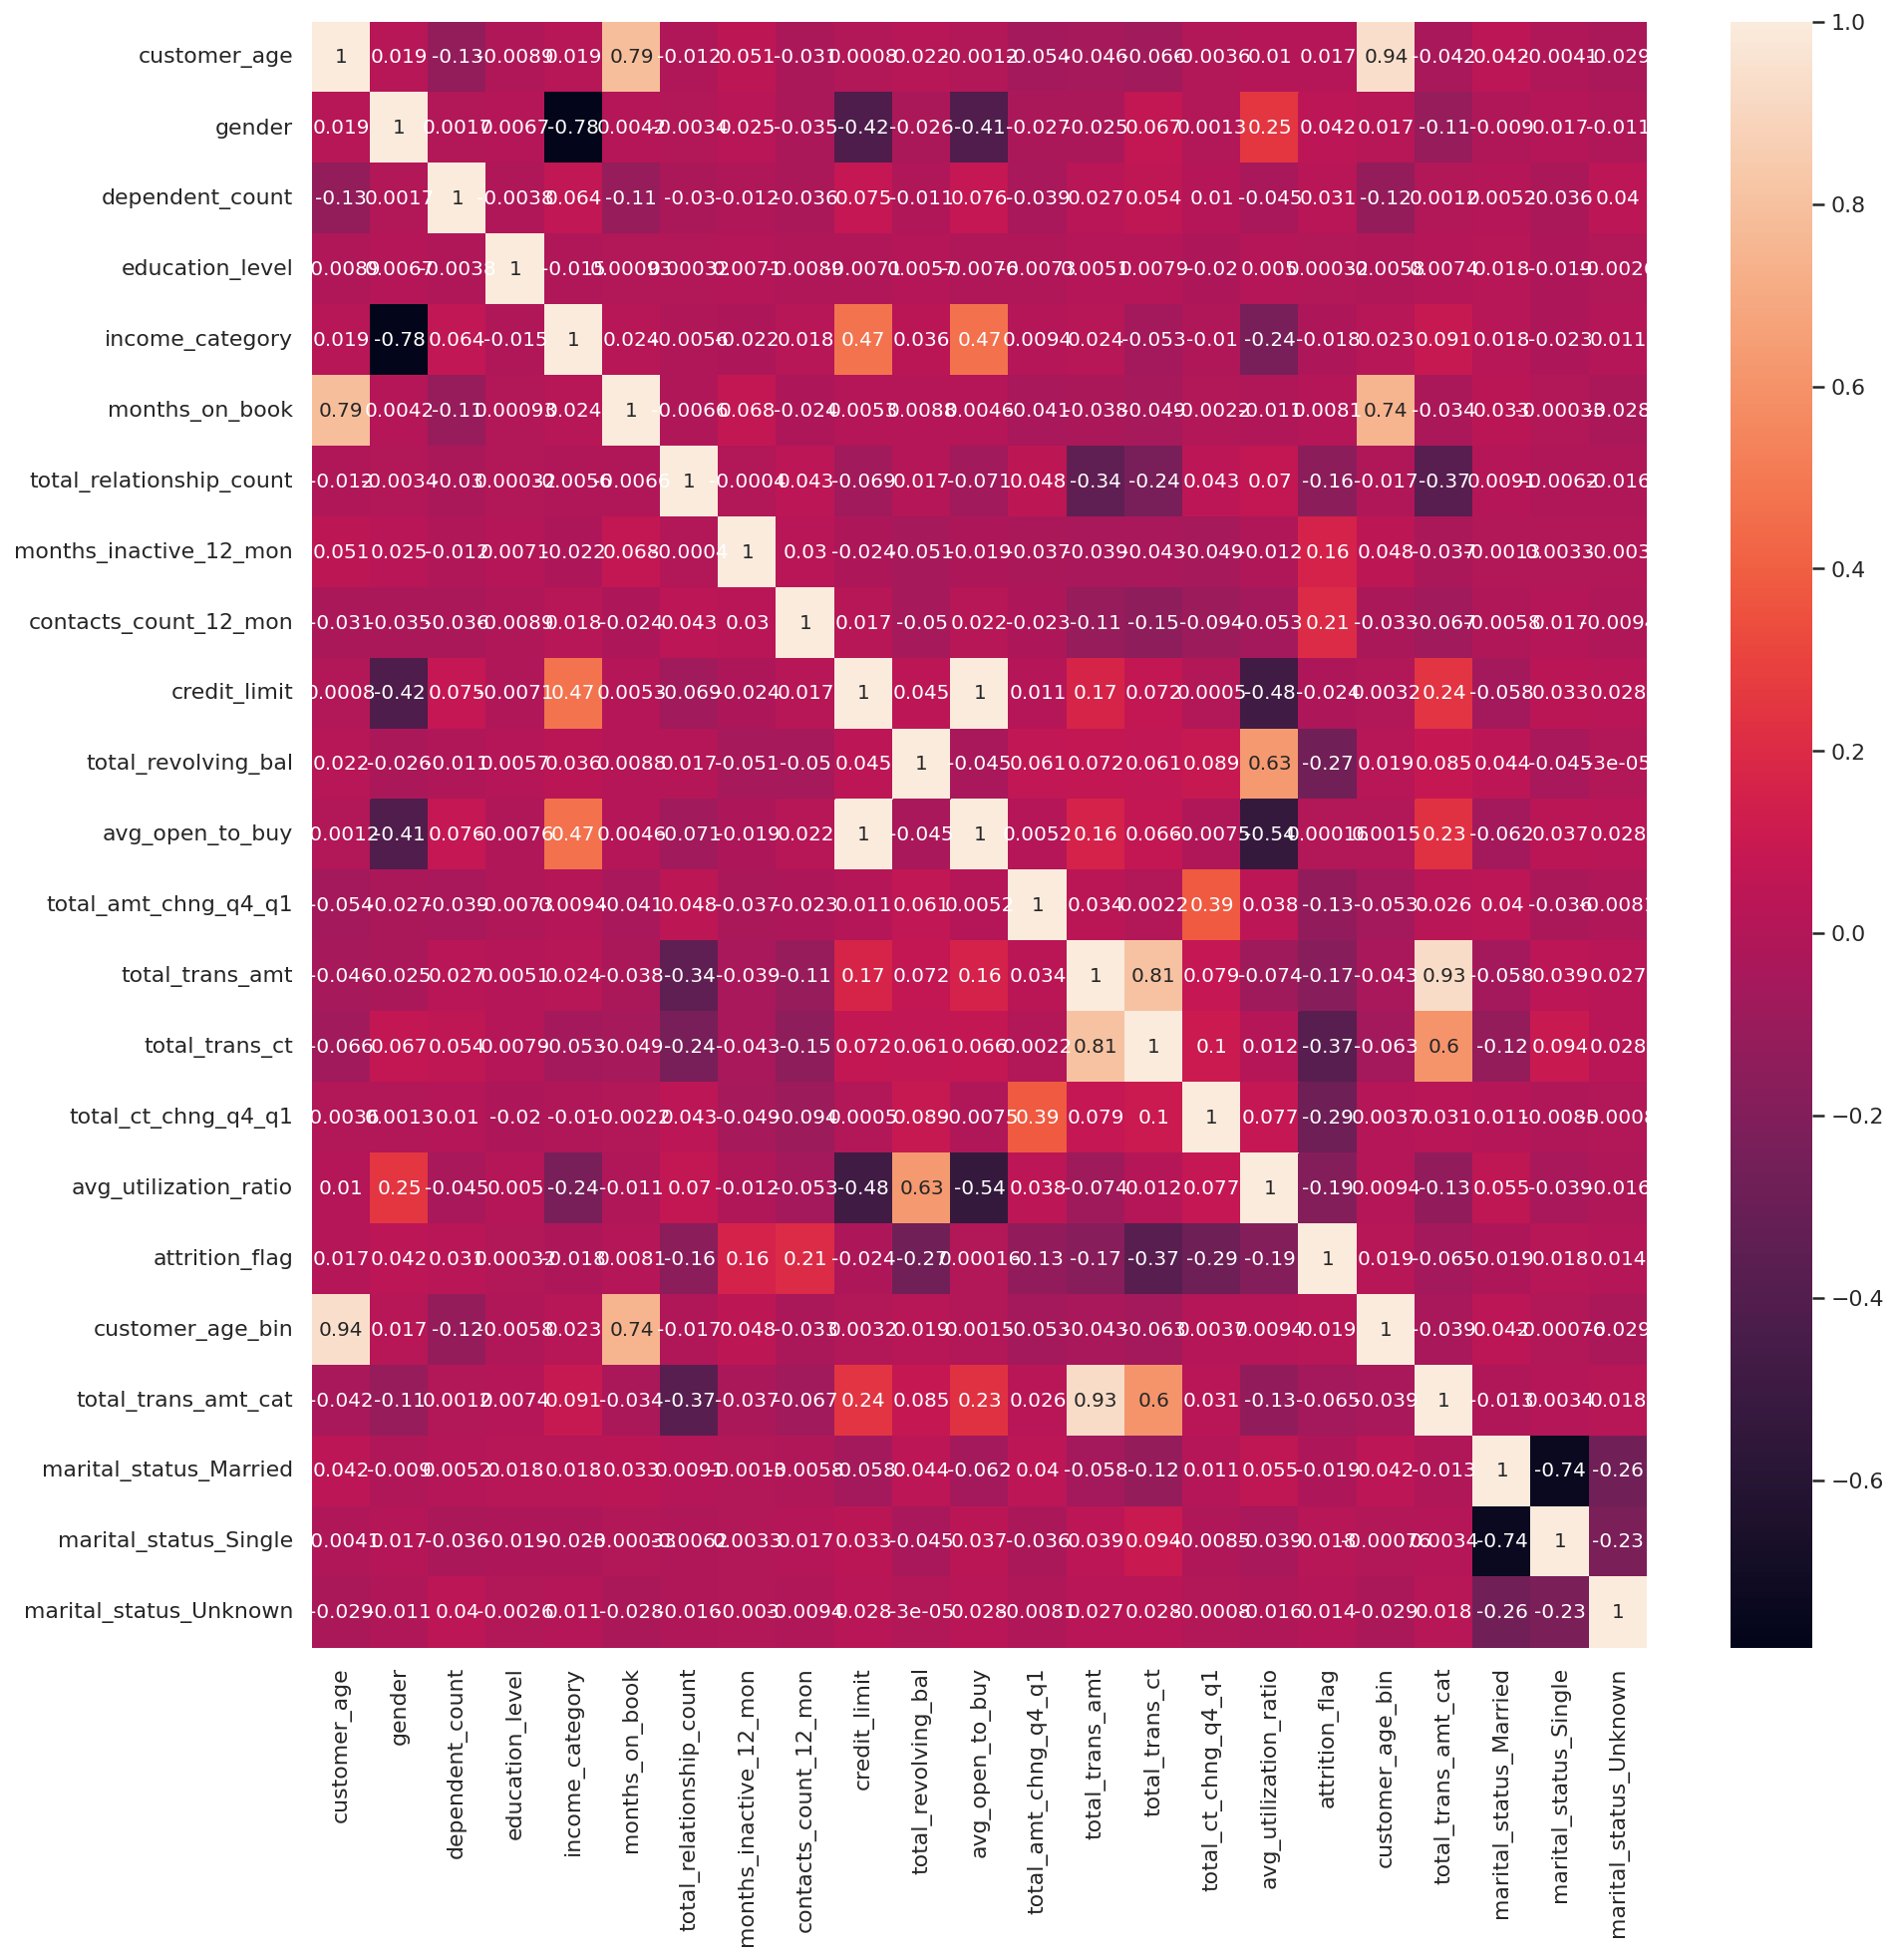

In [48]:
#check correlation
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(),annot=True,fmt=".2g")

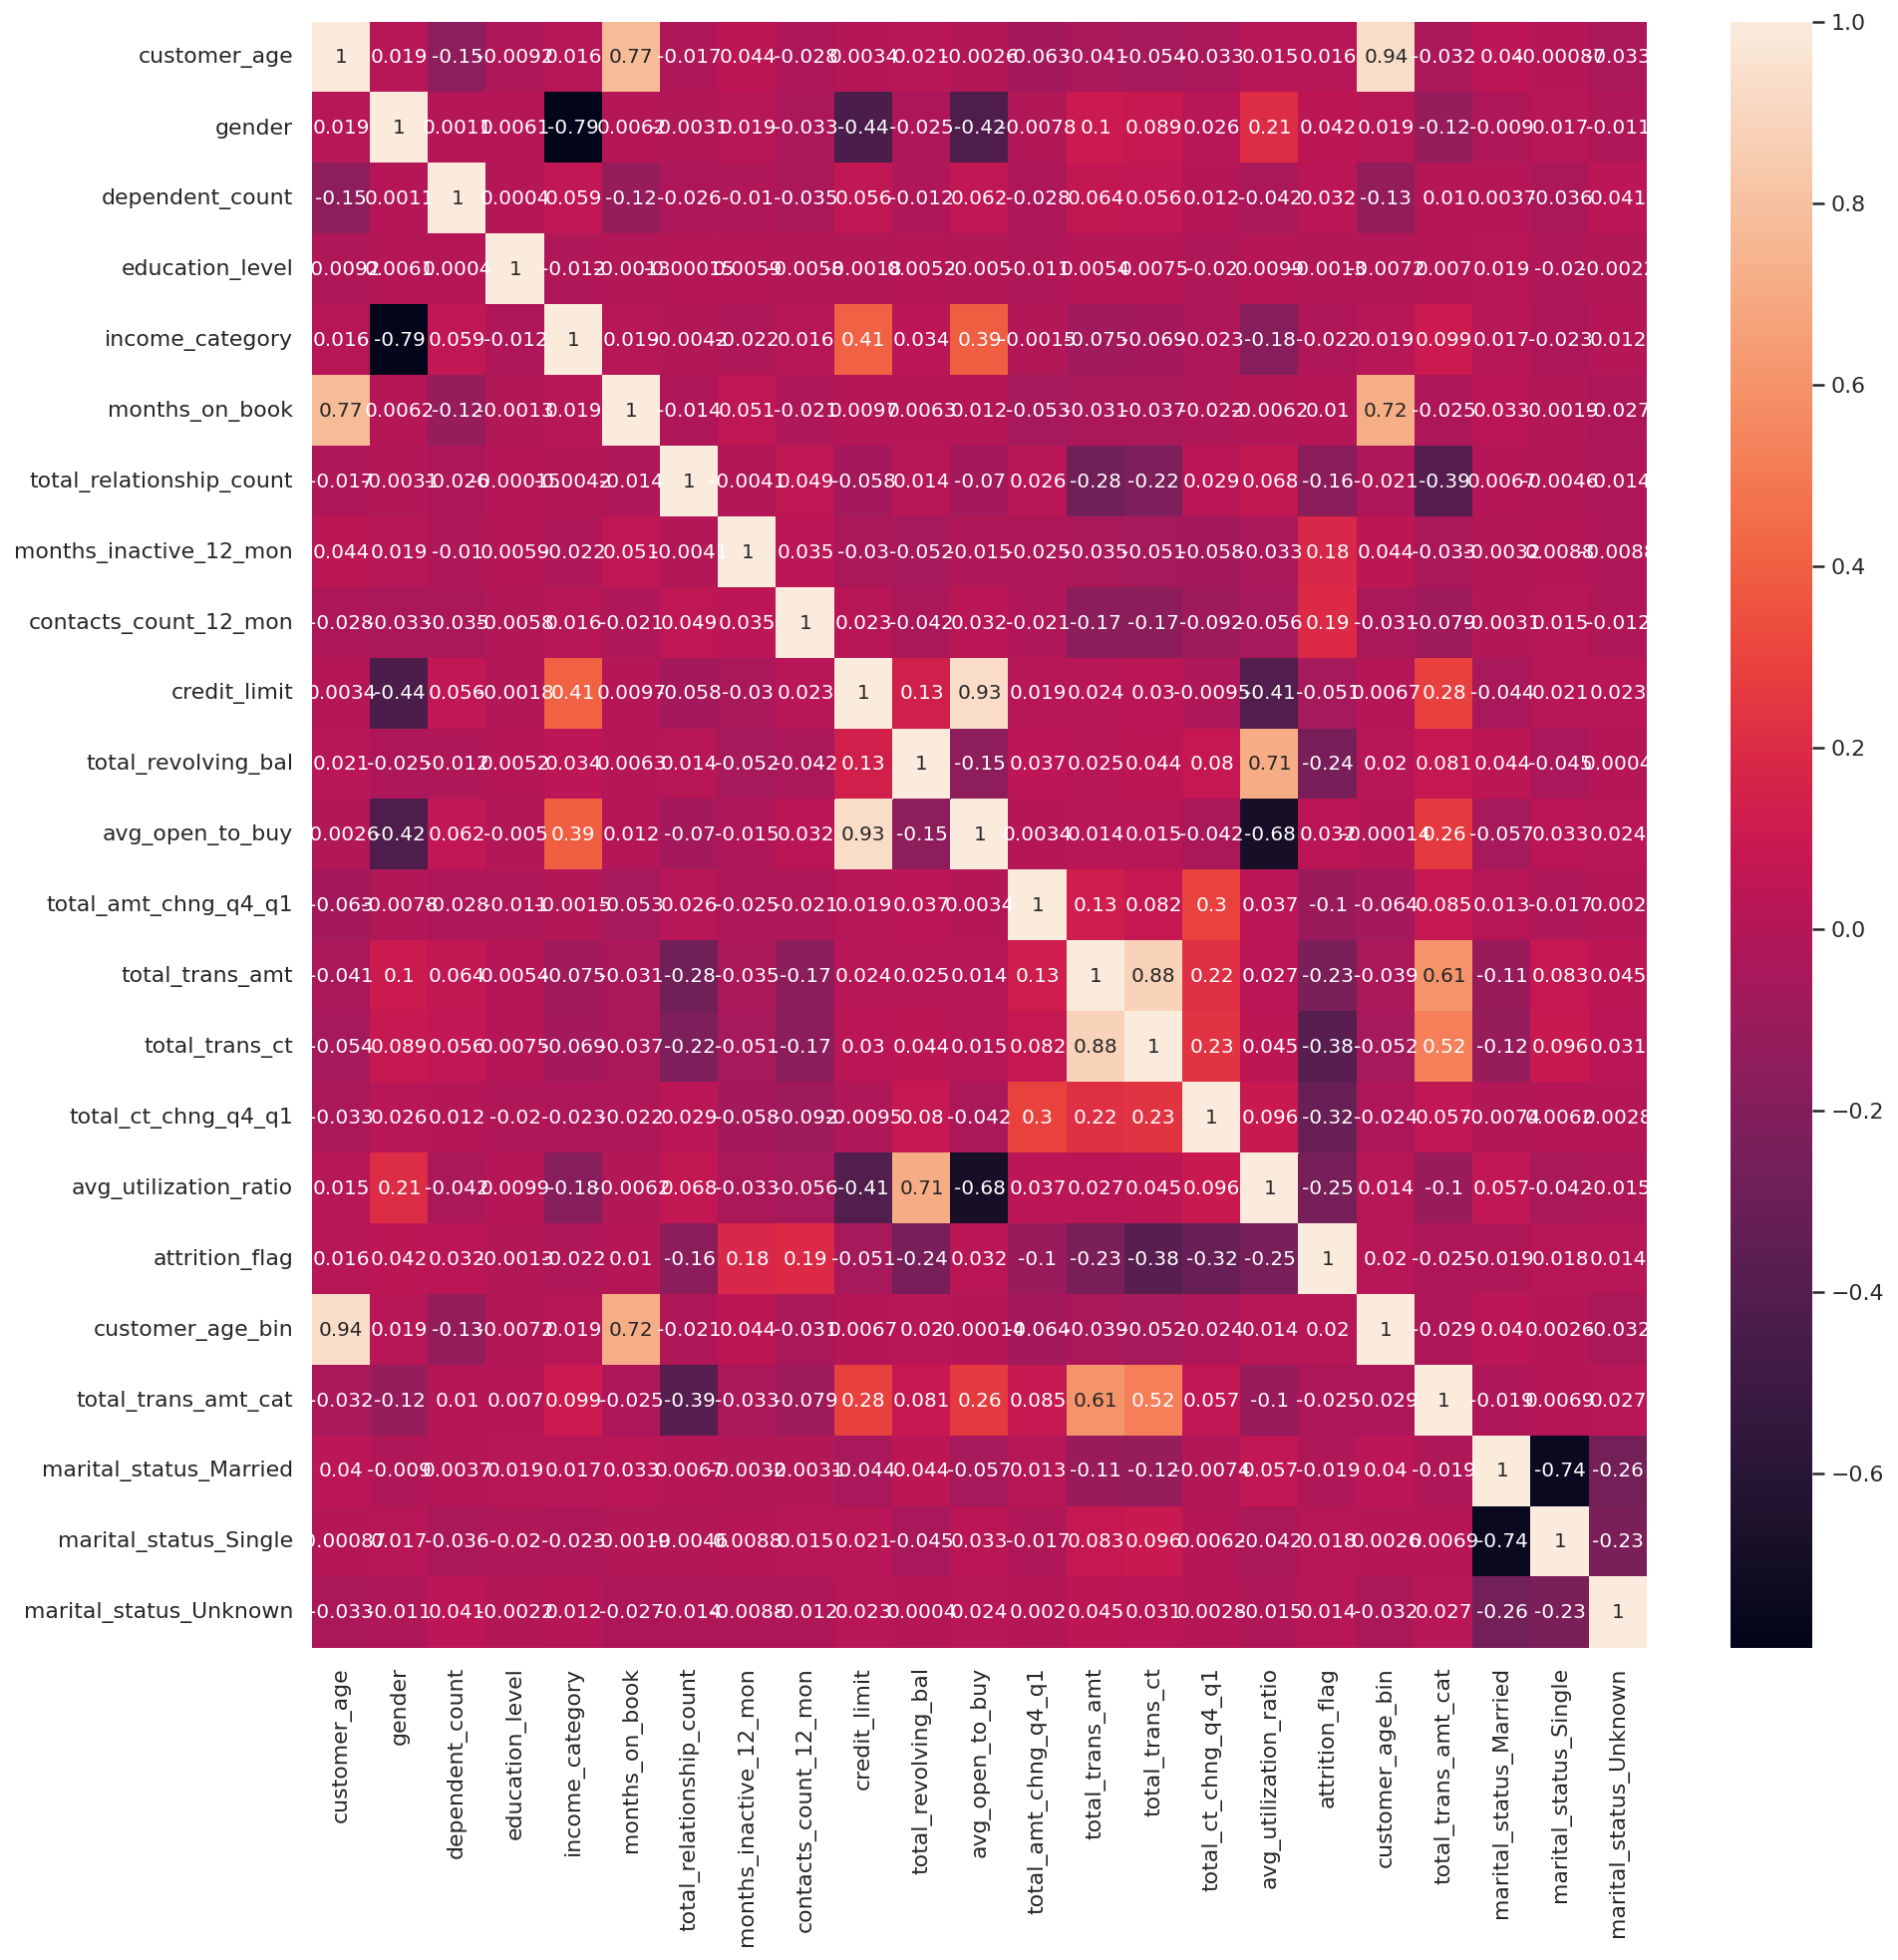

In [49]:
#check correlation
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(method='spearman'),annot=True,fmt=".2g")

In [50]:
#=====columns drop=====
drop_col = ["year_on_book_cat","card_category","customer_age","months_on_book","marital_status_Single","attrition_flag","total_trans_amt_cat"]
X_train  = X_train.drop(drop_col,axis=1)

## Preprocessing Data Test

In [51]:
X_test.head()

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
user_id,,,,,,,,,,,,,,,,,,,
767114958,65,M,0,Uneducated,Single,Less than $40K,Blue,56,4,2,2,3226.0,2073,1153.0,1.035,3250,70,0.591,0.643
708123033,41,F,3,Graduate,Single,Less than $40K,Silver,30,2,1,1,11463.0,0,11463.0,0.908,14511,105,0.721,0.000
715424283,31,F,0,College,Married,Less than $40K,Blue,21,5,2,2,1677.0,0,1677.0,1.369,3059,50,0.613,0.000
717865008,51,F,1,Unknown,Married,$40K - $60K,Blue,36,2,1,1,1438.3,468,970.3,0.747,4425,81,1.077,0.325
710188308,51,F,3,Graduate,Single,Less than $40K,Blue,41,6,2,3,1519.0,1148,371.0,0.767,4927,73,0.738,0.756


In [52]:
X_test["customer_age_bin"] = pd.cut(X_test['customer_age'],bins=[25,30,40,50,60,73],labels=['25-30','30-40','40-50','50-60',"+60"])

amt_amount_cat = []

for x in X_test["total_trans_amt"]:
  if x <6200:
    amt_amount_cat.append("<6200")
  elif x<11000:
    amt_amount_cat.append("6200-11000")
  else:
    amt_amount_cat.append(">11000")

X_test["total_trans_amt_cat"] = amt_amount_cat

#========Nominal Categoty======
nom_cat = ["marital_status"]
X_test = pd.get_dummies(X_test,columns=nom_cat,drop_first=True)


#=====columns drop=====
drop_col = ["card_category","customer_age","months_on_book"]
X_test  = X_test.drop(drop_col,axis=1)

#====mapping========
X_test["gender"] = X_test["gender"].map(map_gender)
X_test["education_level"] = X_test["education_level"].map(map_edu)
X_test["income_category"] = X_test["income_category"].map(map_income)
X_test["customer_age_bin"] = X_test["customer_age_bin"].map(map_age)
X_test["total_trans_amt_cat"] = X_test["total_trans_amt_cat"].map(map_amt_cat)

In [53]:
#drop marital status single and attrition flag dan transfer amount
X_test = X_test.drop(["marital_status_Single","total_trans_amt_cat"],axis=1)

# Modelling

In [54]:
models = []
models.append(("Logistic Regression",LogisticRegression(solver="liblinear",random_state=42)))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("SVM",SVC(gamma='auto',)))
models.append(("KNN",KNeighborsClassifier()))
models.append(("Decision Tree Classifier",DecisionTreeClassifier()))
models.append(("Gausian NB",GaussianNB()))

In [55]:
recall_results = []
precision_results = []
auc_results = []
f1_score = []
names = []
col = ['Algoritm','ROC_AUC_Mean','ROC_AUC_Std',"Recall_Mean","Recall_Std","Precision_Mean","Precision_Std","F1_score_Mean","F1_score_Std"]

df_results = pd.DataFrame(columns=col)

i = 0

c = list(set(X_train.columns))

for name,model in models:
    kfold = model_selection.KFold(n_splits=3)
    cv_recall_results = model_selection.cross_val_score(model,X_train[c],y_train,cv=kfold,scoring="recall")
    
    cv_precision_results = model_selection.cross_val_score(model,X_train[c],y_train,
                                                        cv=kfold,scoring="precision")
    
    cv_auc_results = model_selection.cross_val_score(model,X_train[c],y_train,
                                                   cv=kfold,scoring="roc_auc")
    
    cv_f1_results = model_selection.cross_val_score(model,X_train[c],y_train,
                                                   cv=kfold,scoring="f1")
    recall_results.append(cv_recall_results)
    precision_results.append(cv_precision_results)
    auc_results.append(cv_auc_results)
    f1_score.append(cv_f1_results)
    names.append(name)

    df_results.loc[i] = [name,
                        round(cv_auc_results.mean()*100,2),
                        round(cv_auc_results.std()*100,2),
                        round(cv_recall_results.mean()*100,2),
                        round(cv_recall_results.std()*100,2),
                        round(cv_precision_results.mean()*100,2),
                        round(cv_precision_results.std()*100,2),
                        round(cv_f1_results.mean()*100,2),
                        round(cv_f1_results.std()*100,2)]
    i += 1
df_results.sort_values("ROC_AUC_Mean",ascending=False)

,Algoritm,ROC_AUC_Mean,ROC_AUC_Std,Recall_Mean,Recall_Std,Precision_Mean,Precision_Std,F1_score_Mean,F1_score_Std
1,Random Forest,98.80,0.06,80.89,1.13,92.65,0.90,86.59,0.40
0,Logistic Regression,90.98,0.48,50.33,1.30,73.69,1.94,59.81,1.46
5,Gausian NB,88.17,0.87,63.81,0.93,69.73,2.28,66.63,1.55
4,Decision Tree Classifier,87.74,0.66,79.13,0.58,79.18,0.21,79.52,0.70
3,KNN,87.39,0.87,54.25,0.89,70.95,0.66,61.48,0.45
2,SVM,53.61,0.45,0.00,0.00,0.00,0.00,0.00,0.00


In [56]:
df_results.sort_values("F1_score_Mean",ascending=False)

,Algoritm,ROC_AUC_Mean,ROC_AUC_Std,Recall_Mean,Recall_Std,Precision_Mean,Precision_Std,F1_score_Mean,F1_score_Std
1,Random Forest,98.80,0.06,80.89,1.13,92.65,0.90,86.59,0.40
4,Decision Tree Classifier,87.74,0.66,79.13,0.58,79.18,0.21,79.52,0.70
5,Gausian NB,88.17,0.87,63.81,0.93,69.73,2.28,66.63,1.55
3,KNN,87.39,0.87,54.25,0.89,70.95,0.66,61.48,0.45
0,Logistic Regression,90.98,0.48,50.33,1.30,73.69,1.94,59.81,1.46
2,SVM,53.61,0.45,0.00,0.00,0.00,0.00,0.00,0.00


Random Forest memiliki Score terbaik dengn AUC yang tinggi dan F1 score yang baik

# Evaluation For Data Test

In [57]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1701
           1       0.91      0.79      0.85       325

    accuracy                           0.95      2026
   macro avg       0.94      0.89      0.91      2026
weighted avg       0.95      0.95      0.95      2026



Text(30.5, 0.5, 'Realita')

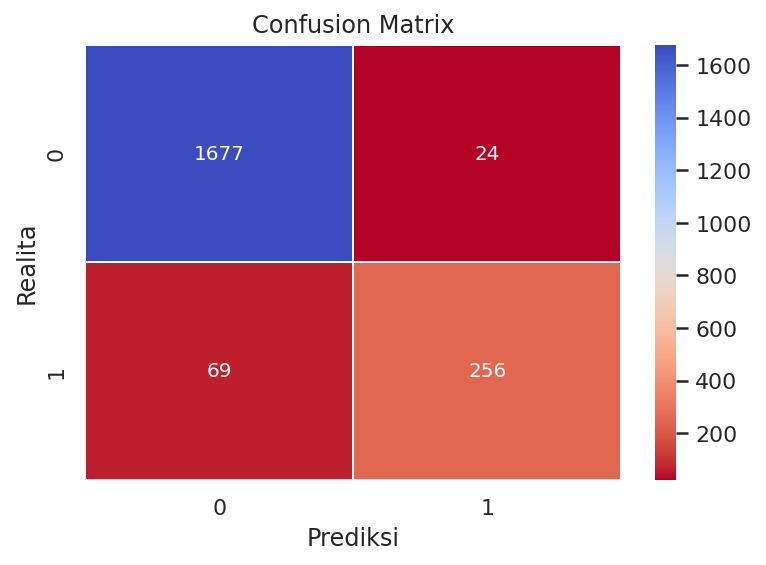

In [58]:
cnf_matrix = metrics.confusion_matrix(y_test, rf.predict(X_test))
print(metrics.classification_report(y_test,rf.predict(X_test)))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Realita')

In [70]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,rf.predict_proba(X_test)[:,1])
roc_auc_value = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Random Forest on test data: ', round(roc_auc_value*100, 2), '%')
print('Gini for Random Forest on test data: ', round(gini_value*100, 2), '%')

AUC for Random Forest on test data:  98.27 %
Gini for Random Forest on test data:  96.54 %


# Intrepretable

In [60]:
!pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.8 MB/s 
  Created wheel for dalex: filename=dalex-1.4.1-py3-none-any.whl size=1042860 sha256=069facc904498f77e937c03f9539322f7a1d5451f854a2b5162375a459511eaf
  Stored in directory: /root/.cache/pip/wheels/8c/8e/1b/95d59374d386e8e495aed6cbab4c4b6d72be73993a424c5e12
Successfully built dalex


In [61]:
import dalex as dx

In [62]:
## initiate explainer for Random Forest model
rf_explainer = dx.Explainer(rf, X_train, y_train, label = "Random Forest Interpretation")

Preparation of a new explainer is initiated

  -> data              : 8101 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8101 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f666f035320> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.161, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.47, mean = 0.000154, max = 0.4
  -> model_info        : package sklearn

A new explainer has been created!


In [63]:
rf_explainer.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 18/18 [00:04<00:00,  3.63it/s]


1.Dengan memikat nasabah untuk memiliki jumlah produk diatas 2 memberikan dampak penurunan probabiliti nasabah untuk meningalkan bank. Dampak penurunan hingga 66%. <br>
2.Peningkatan probability churn bank meningkat tajam saat jumlah kontak sebanyak 6 kali, peningkatan probability hingga 80% <br>
3.Ketika nasabah cukup banyak menggunakan nominal kreditnya memberikan dampak terhadap penurunan probability nasabah untuk churn. 
Kemudian jika diperhatikan terjadi peningkatan probability ketika penggunaan kredit diatas 2000. Hal ini cukup masuk akal karena semakin besar kredit yang digunakan maka nasabah juga akan mengembalikkan kredit dengan nilai yang besar dan memiliki keterkaitan terhadap kemampuan nasabah untuk mengemballikan kredit. <br>
4.Semakin besar frekuensi transaksi probabilitas nasabah churn akan menurun. Nabasabah akan memiliki kemungkinan yang sangat kecil untuk churn ketika frekuensi transaksi diatas 80





In [64]:
# visualize permutation feature importance for ridge regression
rf_explainer.model_parts().plot()

# Lift Curve

In [67]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


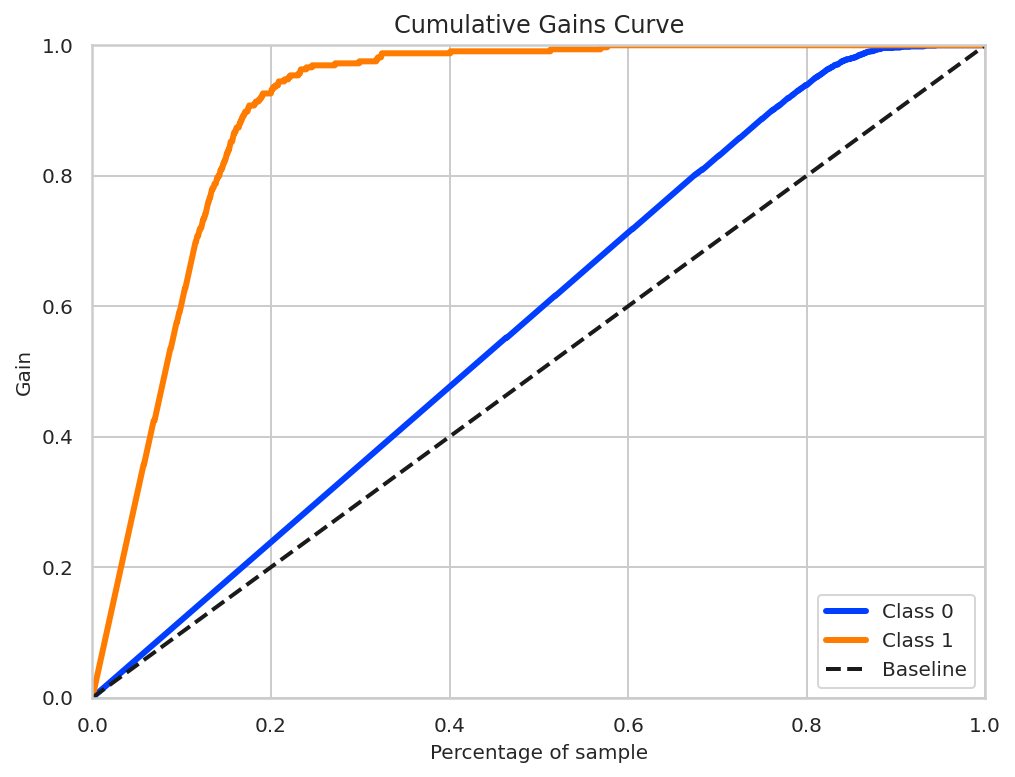

In [68]:
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_test,rf.predict_proba(X_test), title='Cumulative Gains Curve', ax=None, figsize=(8,6), title_fontsize='large', text_fontsize='medium')

berdasarkan cummulative gains, model memiliki performa yang sangat baik karena mampu mengcapture 95% nasabah yang terindentifikasi churn pada 20% populasi berdasarkan probilitas tertinggi.

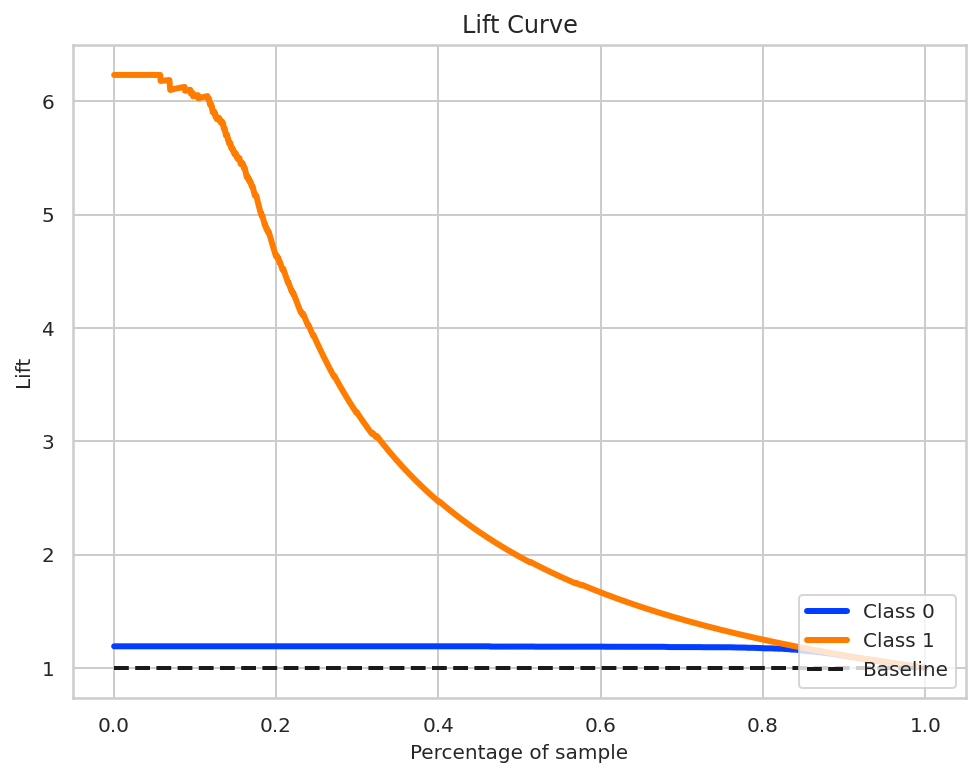

In [69]:
skplt.metrics.plot_lift_curve(y_test,rf.predict_proba(X_test), title='Lift Curve', ax=None, figsize=(8,6), title_fontsize='large', text_fontsize='medium')

model memiliki performas 4.5 kali lebih baik dibandingkan random choice pada populasi 20%